<a href="https://colab.research.google.com/github/YuvarajCU/Office-Supplies-orders-Case-study/blob/main/Office_Supplies_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 2: Office Supplies orders Case study**





### Downloading and importing the dependencies

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#!pip install pandas-profiling --upgrade
!pip install visions==0.7.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.6 MB 22.6 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 11.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344995 sha256=2029847909db6b7c7b8b6ac1124719bcc993db81ca05194a3c8b23637e80847b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ij03jhji/wheels/43/c8/f4/c0ebc32d7f20fe89d0e92d90eaeef5f0c0594a89b6bc16b352
Successfully built ydata-profiling
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninst

In [ ]:
!pip install pyyaml  # To get proper layout of the output
!pip install pyyaml  --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# To upload the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Loading the data

In [ ]:
path='/content/drive/MyDrive/Hero Vired/Office Supplies Data Analysis/Office Supplies Orders Case Study Data 1.xlsx'
data=pd.read_excel(path)

## 1. Data Health Review

In [ ]:
data.head(2)

Order ID Order Date  Ship Date     Ship Mode   Customer ID  \
0  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   First Class  AB-100151402   
1    IN-2014-JR162107-41675 2014-02-05 2014-02-07  Second Class     JR-162107   

   Customer Name    Segment  Postal Code           City            State  ...  \
0  Aaron Bergman   Consumer      73120.0  Oklahoma City         Oklahoma  ...   
1  Justin Ritter  Corporate          NaN     Wollongong  New South Wales  ...   

    Product ID    Category Sub-Category  \
0  TEC-PH-5816  Technology       Phones   
1  FUR-CH-5379   Furniture       Chairs   

                                Product Name     Sales Quantity Discount  \
0                           Samsung Convoy 3   221.980        2      0.0   
1  Novimex Executive Leather Armchair, Black  3709.395        9      0.1   

     Profit  Shipping Cost  Order Priority  
0   62.1544          40.77            High  
1 -288.7650         923.63        Critical  

[2 rows x 23 columns]

In [ ]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   Postal Code     9994 non-null   float64       
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

The variables listed above are defined in their correct respective datatypes, except for Postal Codes.


Based on the Overall objectives, The chosen varibles for Feature engineeing - 'Ship Mode', 'Segment', 'Market', 'Category', 'Sub_Category','Order Priority'

In [ ]:
# Checking percentage of missing values
(data.isnull().mean()*100).sort_values(ascending = False)

Postal Code       80.51472
Order ID           0.00000
Market             0.00000
Shipping Cost      0.00000
Profit             0.00000
Discount           0.00000
Quantity           0.00000
Sales              0.00000
Product Name       0.00000
Sub-Category       0.00000
Category           0.00000
Product ID         0.00000
Region             0.00000
Order Date         0.00000
Country            0.00000
State              0.00000
City               0.00000
Segment            0.00000
Customer Name      0.00000
Customer ID        0.00000
Ship Mode          0.00000
Ship Date          0.00000
Order Priority     0.00000
dtype: float64

It is evident from the above two outputs, that the varibale Postal Codes can be dropped with primary reason as it has a huge count of data missing.

In [ ]:
data.drop(['Postal Code'], axis =1 , inplace = True)

In [ ]:
# create new column for total revenue
data['Total Revenue'] = data['Sales'] * data['Quantity']

# reset the index
data.reset_index(drop=True, inplace=True)
data.sample(5)

Order ID Order Date  Ship Date       Ship Mode  \
26157   ES-2015-EP1391545-42264 2015-09-17 2015-09-22  Standard Class   
21420   MX-2015-AS1028518-42342 2015-12-04 2015-12-04        Same Day   
9876      AO-2015-GM45004-42265 2015-09-18 2015-09-24  Standard Class   
47756  CA-2013-SS20515140-41479 2013-07-24 2013-07-28  Standard Class   
38393   IN-2015-LB1679558-42064 2015-03-01 2015-03-06  Standard Class   

        Customer ID     Customer Name      Segment        City  \
26157    EP-1391545        Emily Phan     Consumer   Villejuif   
21420    AS-1028518  Alejandro Savely    Corporate   São Paulo   
9876       GM-45004      Gene McClure     Consumer      Luanda   
47756  SS-205151408   Shirley Schmidt  Home Office  Louisville   
38393    LB-1679558    Laurel Beltran  Home Office      Ratlam   

                State        Country  ...         Category Sub-Category  \
26157   Ile-de-France         France  ...       Technology      Copiers   
21420       São Paulo         Brazil  ...  Office Supplies      Storage   
9876           Luanda         Angola  ...  Office Supplies      Storage   
47756        Kentucky  United States  ...  Office Supplies      Binders   
38393  Madhya Pradesh          India  ...  Office Supplies      Binders   

                                            Product Name    Sales Quantity  \
26157                      Hewlett Wireless Fax, Digital  645.711        2   
21420                              Eldon Box, Industrial   35.800        5   
9876                    Fellowes File Cart, Single Width  274.680        2   
47756  GBC Prepunched Paper, 19-Hole, for Binding Sys...  135.090        9   
38393                              Avery Binder, Durable   28.800        2   

      Discount   Profit  Shipping Cost  Order Priority  Total Revenue  
26157     0.15 -22.8090          7.490          Medium       1291.422  
21420     0.00  17.5000         11.058        Critical        179.000  
9876      0.00   0.0000         33.400             Low        549.360  
47756     0.00  62.1414          9.600            High       1215.810  
38393     0.00   1.9800          2.630          Medium         57.600  

[5 rows x 23 columns]

In [ ]:
data.duplicated().sum()

0

With no variables with missing data or duplicated data, we are good to go with the present dataset.

In [ ]:
categorical = [col for col in data.columns if data[col].dtypes == 'O']
print('The Categorical variables are : \n ', categorical)

The Categorical variables are : 
  ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Order Priority']


In [ ]:
Numerical = [col for col in data.columns if (data[col].dtypes == 'int64') or (data[col].dtypes == 'float64') ]
print('The Numerical variables are : \n ', Numerical)

The Numerical variables are : 
  ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Total Revenue']


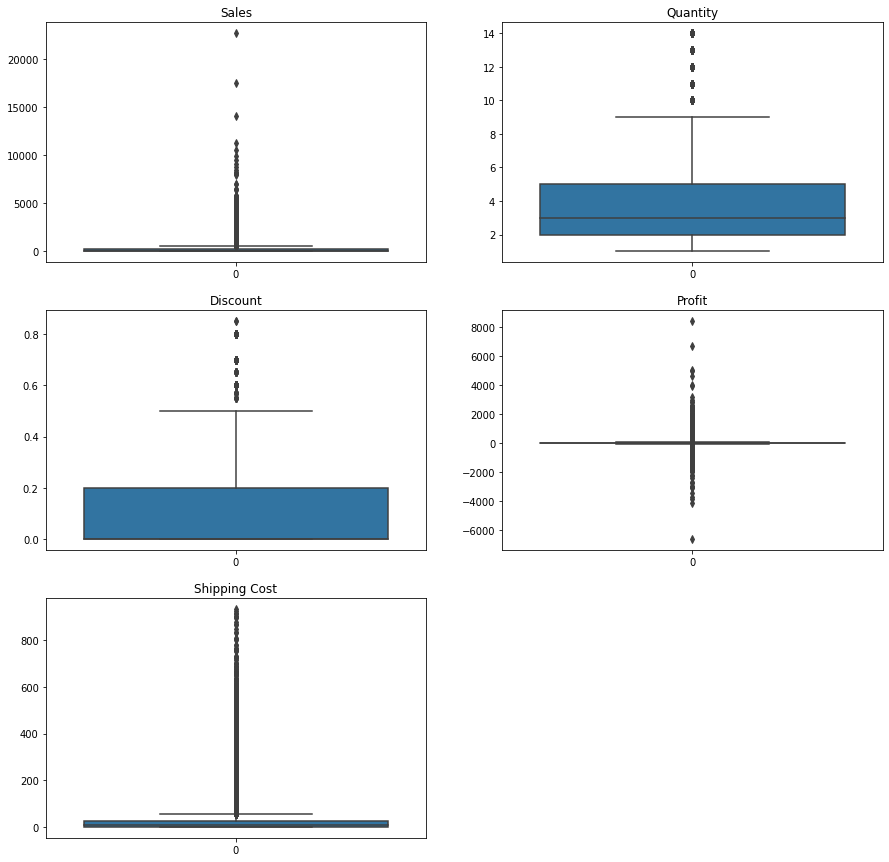

In [ ]:
plt.figure(figsize = (15,15))

plt.subplot(3,2,1)
sns.boxplot(data = data["Sales"])
plt.title('Sales')

plt.subplot(3,2,2)
sns.boxplot(data = data["Quantity"])
plt.title('Quantity')


plt.subplot(3,2,3)
sns.boxplot(data = data["Discount"])
plt.title('Discount')

plt.subplot(3,2,4)
sns.boxplot(data = data["Profit"])
plt.title('Profit')

plt.subplot(3,2,5)
sns.boxplot(data = data["Shipping Cost"])
plt.title('Shipping Cost')

plt.show()

The variables **Sales,Discount,Quantities,Profit and Shipping Cost** have outliers.

In [ ]:
col = data.columns
for i in col:
  print(i, 'percent :' ,(len(data[i].unique())/len(data[i])) * 100)

Order ID percent : 50.16182491713784
Order Date percent : 2.78806784948333
Ship Date percent : 2.854357574575941
Ship Mode percent : 0.007798791187365959
Customer ID percent : 33.95398713199454
Customer Name percent : 1.5519594462858257
Segment percent : 0.005849093390524468
City percent : 7.116396958471436
State percent : 2.1485669721193217
Country percent : 0.32170013647884577
Region percent : 0.04484304932735426
Market percent : 0.009748488984207448
Product ID percent : 7.385455254435562
Category percent : 0.005849093390524468
Sub-Category percent : 0.033144862546305325
Product Name percent : 7.385455254435562
Sales percent : 44.83330083837006
Quantity percent : 0.02729576915578085
Discount percent : 0.05264184051472022
Profit percent : 48.812634041723534
Shipping Cost percent : 32.076428153636186
Order Priority percent : 0.007798791187365959
Total Revenue percent : 54.306882433222846


In [ ]:
data.describe(percentiles = [.01, .05, .25, .50, .75, .95, .99],include='all').T

<ipython-input-17-6bcf2a83a297>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(percentiles = [.01, .05, .25, .50, .75, .95, .99],include='all').T
<ipython-input-17-6bcf2a83a297>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(percentiles = [.01, .05, .25, .50, .75, .95, .99],include='all').T


count unique                       top   freq      first  \
Order ID          51290  25728  CA-2015-SV20365140-42268     14        NaT   
Order Date        51290   1430       2015-06-18 00:00:00    135 2012-01-01   
Ship Date         51290   1464       2015-11-22 00:00:00    130 2012-01-03   
Ship Mode         51290      4            Standard Class  30775        NaT   
Customer ID       51290  17415              SV-203651406     26        NaT   
Customer Name     51290    796           Muhammed Yedwab    108        NaT   
Segment           51290      3                  Consumer  26518        NaT   
City              51290   3650             New York City    915        NaT   
State             51290   1102                California   2001        NaT   
Country           51290    165             United States   9994        NaT   
Region            51290     23            Western Europe   5883        NaT   
Market            51290      5              Asia Pacific  14302        NaT   
Product ID        51290   3788               OFF-FA-6129    227        NaT   
Category          51290      3           Office Supplies  31289        NaT   
Sub-Category      51290     17                   Binders   6146        NaT   
Product Name      51290   3788                   Staples    227        NaT   
Sales           51290.0    NaN                       NaN    NaN        NaT   
Quantity        51290.0    NaN                       NaN    NaN        NaT   
Discount        51290.0    NaN                       NaN    NaN        NaT   
Profit          51290.0    NaN                       NaN    NaN        NaT   
Shipping Cost   51290.0    NaN                       NaN    NaN        NaT   
Order Priority    51290      4                    Medium  29433        NaT   
Total Revenue   51290.0    NaN                       NaN    NaN        NaT   

                     last         mean          std       min         1%  \
Order ID              NaT          NaN          NaN       NaN        NaN   
Order Date     2015-12-31          NaN          NaN       NaN        NaN   
Ship Date      2016-01-07          NaN          NaN       NaN        NaN   
Ship Mode             NaT          NaN          NaN       NaN        NaN   
Customer ID           NaT          NaN          NaN       NaN        NaN   
Customer Name         NaT          NaN          NaN       NaN        NaN   
Segment               NaT          NaN          NaN       NaN        NaN   
City                  NaT          NaN          NaN       NaN        NaN   
State                 NaT          NaN          NaN       NaN        NaN   
Country               NaT          NaN          NaN       NaN        NaN   
Region                NaT          NaN          NaN       NaN        NaN   
Market                NaT          NaN          NaN       NaN        NaN   
Product ID            NaT          NaN          NaN       NaN        NaN   
Category              NaT          NaN          NaN       NaN        NaN   
Sub-Category          NaT          NaN          NaN       NaN        NaN   
Product Name          NaT          NaN          NaN       NaN        NaN   
Sales                 NaT   246.490581   487.565361     0.444       3.69   
Quantity              NaT     3.476545     2.278766       1.0        1.0   
Discount              NaT     0.142908      0.21228       0.0        0.0   
Profit                NaT    28.610982   174.340972 -6599.978 -351.50565   
Shipping Cost         NaT    26.478567    57.251373     1.002       1.11   
Order Priority        NaT          NaN          NaN       NaN        NaN   
Total Revenue         NaT  1205.327987  3452.079528     0.444       4.53   

                       5%        25%      50%       75%          95%  \
Order ID              NaN        NaN      NaN       NaN          NaN   
Order Date            NaN        NaN      NaN       NaN          NaN   
Ship Date             NaN        NaN      NaN       NaN          NaN   
Ship Mode             NaN       

In [ ]:
data.head(10)

Order ID Order Date  Ship Date       Ship Mode  \
0  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
1    IN-2014-JR162107-41675 2014-02-05 2014-02-07    Second Class   
2    IN-2014-CR127307-41929 2014-10-17 2014-10-18     First Class   
3   ES-2014-KM1637548-41667 2014-01-28 2014-01-30     First Class   
4   SG-2014-RH9495111-41948 2014-11-05 2014-11-06        Same Day   
5    IN-2014-JM156557-41818 2014-06-28 2014-07-01    Second Class   
6   IN-2012-TS2134092-41219 2012-11-06 2012-11-08     First Class   
7   IN-2013-MB1808592-41378 2013-04-14 2013-04-18  Standard Class   
8  CA-2014-AB10015140-41954 2014-11-11 2014-11-13     First Class   
9  CA-2012-AB10015140-40974 2012-03-06 2012-03-07     First Class   

    Customer ID     Customer Name      Segment           City  \
0  AB-100151402     Aaron Bergman     Consumer  Oklahoma City   
1     JR-162107     Justin Ritter    Corporate     Wollongong   
2     CR-127307      Craig Reiter     Consumer       Brisbane   
3    KM-1637548  Katherine Murray  Home Office         Berlin   
4    RH-9495111       Rick Hansen     Consumer          Dakar   
5     JM-156557       Jim Mitchum    Corporate         Sydney   
6    TS-2134092     Toby Swindell     Consumer        Porirua   
7    MB-1808592        Mick Brown     Consumer       Hamilton   
8  AB-100151402     Aaron Bergman     Consumer  Oklahoma City   
9  AB-100151404     Aaron Bergman     Consumer        Seattle   

             State        Country  ...    Category Sub-Category  \
0         Oklahoma  United States  ...  Technology       Phones   
1  New South Wales      Australia  ...   Furniture       Chairs   
2       Queensland      Australia  ...  Technology       Phones   
3           Berlin        Germany  ...  Technology       Phones   
4            Dakar        Senegal  ...  Technology      Copiers   
5  New South Wales      Australia  ...  Technology       Phones   
6       Wellington    New Zealand  ...   Furniture       Chairs   
7          Waikato    New Zealand  ...   Furniture       Tables   
8         Oklahoma  United States  ...   Furniture    Bookcases   
9       Washington  United States  ...   Furniture       Chairs   

                                        Product Name     Sales Quantity  \
0                                   Samsung Convoy 3   221.980        2   
1          Novimex Executive Leather Armchair, Black  3709.395        9   
2                  Nokia Smart Phone, with Caller ID  5175.171        9   
3                     Motorola Smart Phone, Cordless  2892.510        5   
4                     Sharp Wireless Fax, High-Speed  2832.960        8   
5                Samsung Smart Phone, with Caller ID  2862.675        5   
6     Novimex Executive Leather Armchair, Adjustable  1822.080        4   
7       Chromcraft Conference Table, Fully Assembled  5244.840        6   
8  Sauder Facets Collection Library, Sky Alder Fi...   341.960        2   
9         Global Push Button Manager's Chair, Indigo    48.712        1   

  Discount    Profit  Shipping Cost  Order Priority  Total Revenue  
0      0.0   62.1544          40.77            High        443.960  
1      0.1 -288.7650         923.63        Critical      33384.555  
2      0.1  919.9710         915.49          Medium      46576.539  
3      0.1  -96.5400         910.16          Medium      14462.550  
4      0.0  311.5200         903.04        Critical      22663.680  
5      0.1  763.2750         897.35        Critical      14313.375  
6      0.0  564.8400         894.77        Critical       7288.320  
7      0.0  996.4800         878.38            High      31469.040  
8      0.0   54.7136          25.27            High        683.920  
9      0.2    5.4801          11.13            High         48.712  

[10 rows x 23 columns]

# Exploratory Data Analysis

## Univariant Analysis

Here, the Pandas Profiling is being used to conduct Univariant Analysis of the given dataset



In [ ]:
import ydata_profiling as pp
from pandas_profiling import ProfileReport

<ipython-input-19-96887564cb52>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile = pp.ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Categorical

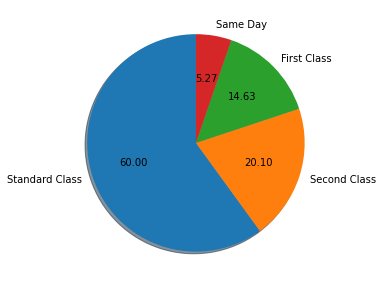

In [ ]:
plt.figure(figsize = (5,5))
piechart = data["Ship Mode"].value_counts()
plt.pie(piechart,labels=piechart.index,autopct="%.2f",startangle=90,shadow=True)
font = {'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.show()

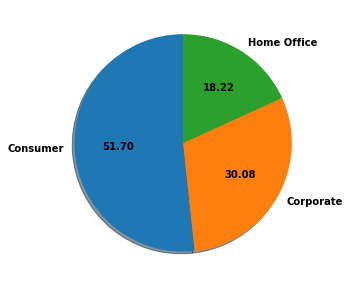

In [ ]:
plt.figure(figsize = (5,5))
piechart = data["Segment"].value_counts()
plt.pie(piechart,labels=piechart.index,autopct="%.2f",startangle=90,shadow=True)
font = {'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.show()

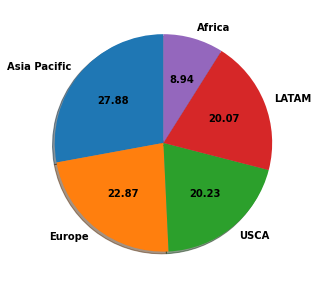

In [ ]:
plt.figure(figsize = (5,5))
piechart = data["Market"].value_counts()
plt.pie(piechart,labels=piechart.index,autopct="%.2f",startangle=90,shadow=True)
font = {'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.show()

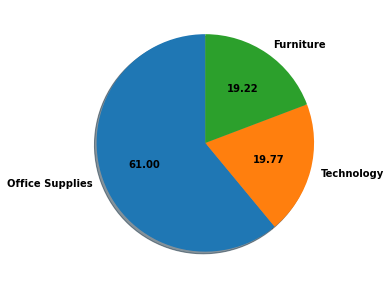

In [ ]:
plt.figure(figsize = (5,5))
piechart = data["Category"].value_counts()
plt.pie(piechart,labels=piechart.index,autopct="%.2f",startangle=90,shadow=True)
font = {'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.show()

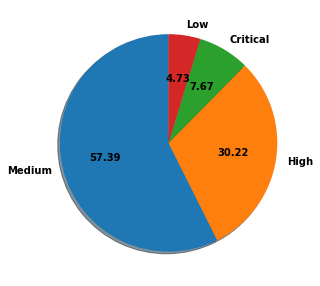

In [ ]:
plt.figure(figsize = (5,5))
piechart = data["Order Priority"].value_counts()
plt.pie(piechart,labels=piechart.index,autopct="%.2f",startangle=90,shadow=True)
font = {'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)
plt.show()

# Bivariant Analysis

Quantity                1          2          3          4          5   \
Category                                                                 
Furniture        17.259846  19.281456  20.409006  18.480814  19.479721   
Office Supplies  63.003459  61.052714  59.657096  61.080658  60.815240   
Technology       19.736695  19.665830  19.933898  20.438528  19.705039   

Quantity                6          7          8          9          10  \
Category                                                                 
Furniture        20.132450  21.215933  19.985305  21.479230  17.753623   
Office Supplies  61.092715  59.916143  58.633358  59.473151  62.318841   
Technology       18.774834  18.867925  21.381337  19.047619  19.927536   

Quantity                11         12         13         14  
Category                                                     
Furniture        17.307692  17.045455  13.253012  17.741935  
Office Supplies  60.897436  63.636364  66.265060  65.053763  
Technology

<Figure size 2160x2160 with 0 Axes>

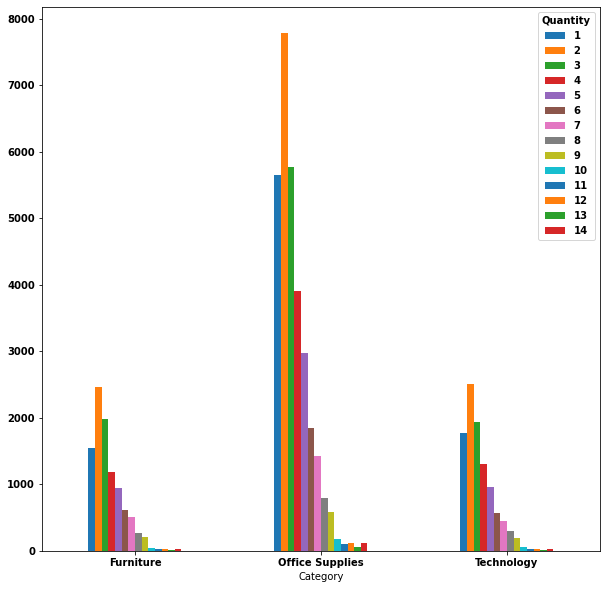

In [ ]:
cross_tab = pd.crosstab(index=data['Category'],
                        columns=data['Quantity'])

cross_tab_prop = pd.crosstab(index=data['Category'],
                             columns=data['Quantity'],
                             normalize="columns")

print(cross_tab_prop * 100)

plt.figure(figsize=(30,30))
plt.rcParams['font.family'] = 'sans-serif'
barplot = cross_tab.plot.bar(rot=0,figsize=(10,10))

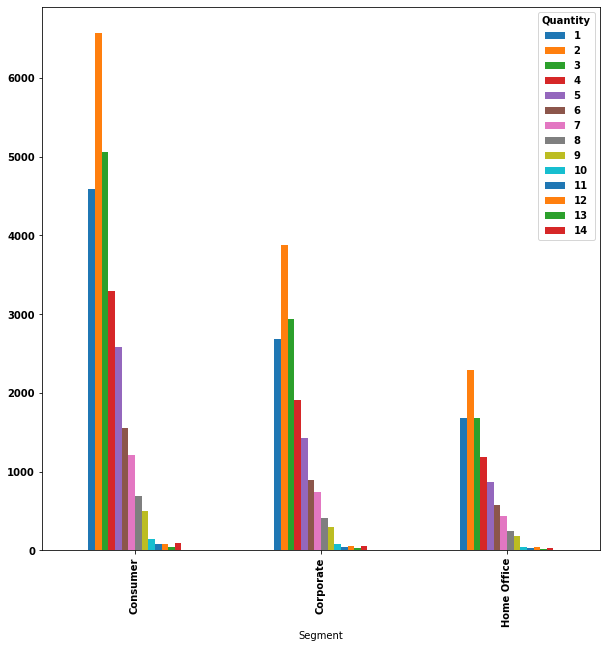

In [ ]:
pd.crosstab(data["Segment"],data["Quantity"]).plot(kind = "bar",figsize=(10,10))
plt.show()

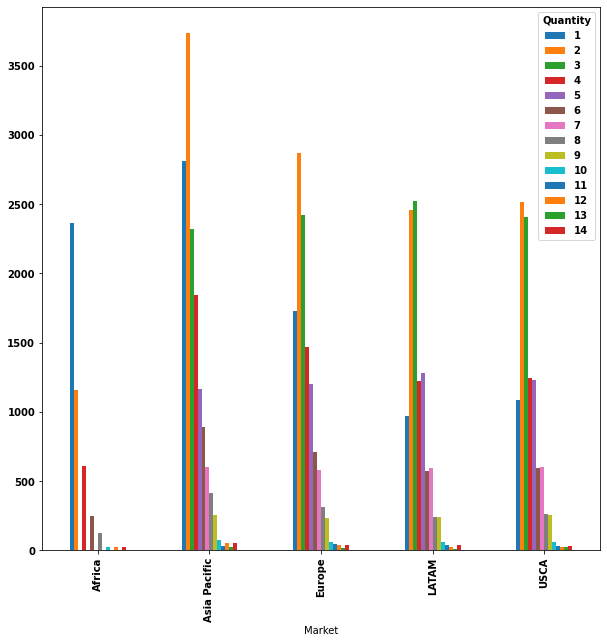

In [ ]:
pd.crosstab(data["Market"],data["Quantity"]).plot(kind = "bar",figsize=(10,10))
plt.show()

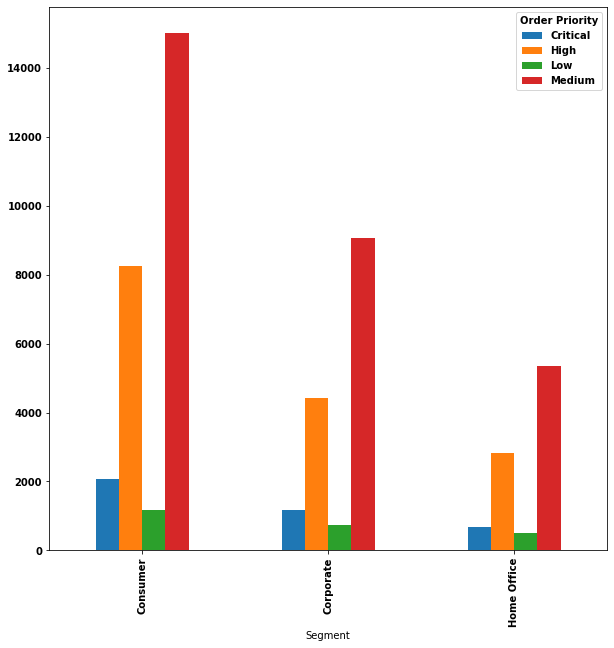

In [ ]:
pd.crosstab(data["Segment"],data["Order Priority"]).plot(kind = "bar",figsize=(10,10))
plt.show()

# Section 4

In [ ]:
# Convert the date column to a datetime object
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Add a new column with the month information
data['month'] = data['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

# Group data by month and perform sum operation
df_monthly = data.groupby('month').sum()

# Set the index of the DataFrame to the grouping variable
df_monthly = df_monthly.reset_index()

# Export the data to a new csv file
df_monthly.to_csv('data_monthly.csv', index=True)

df_monthly

month         Sales  Quantity  Discount       Profit  Shipping Cost  \
0   2012-01   98898.48886      1463    68.758   8321.80096    10596.78800   
1   2012-02  103717.92328      1401    58.192  14323.06088    12051.32300   
2   2012-03  135746.40206      1745    74.272  13089.62696    12207.49350   
3   2012-04  114332.96318      1934    74.782  13211.11178    12631.05200   
4   2012-05  158228.32880      2167    87.472  14644.08230    17691.76400   
5   2012-06  207571.54352      3002   157.544  20940.59862    23144.15600   
6   2012-07  118434.88462      1836    87.436   4040.60682    12240.54100   
7   2012-08  208063.28372      3020   113.462  26452.99742    22145.56500   
8   2012-09  284587.74846      3644   135.630  35044.52286    29089.70100   
9   2012-10  216114.56748      2981   124.392  27597.95588    23234.12400   
10  2012-11  293947.35216      3924   169.544  33242.88306    34466.55500   
11  2012-12  319807.40940      4326   181.910  38031.56400    35712.28300   
12  2013-01  137435.97514      1874    76.994  10306.71254    13894.16800   
13  2013-02   98854.96208      1444    60.244  15095.02128    11261.30700   
14  2013-03  163076.77116      2237   101.682  17992.91756    16240.78500   
15  2013-04  161052.26952      2250    93.248  17366.96722    16839.86200   
16  2013-05  208364.89124      2921   114.272  29876.70374    23888.61700   
17  2013-06  256175.69842      3671   168.284  34407.15362    28275.90000   
18  2013-07  145236.78512      2321   104.404  15585.38842    17404.43500   
19  2013-08  303142.94238      3818   136.166  43573.87858    32128.73000   
20  2013-09  289389.16564      4205   169.070  27776.18034    28144.17800   
21  2013-10  252939.85020      3563   135.866  30662.88270    25170.74000   
22  2013-11  323512.41690      5193   215.868  31820.72180    33633.74100   
23  2013-12  338256.96660      4614   172.676  32950.75130    37708.36100   
24  2014-01  199185.90738      2413    91.442  26810.55968    21746.43200   
25  2014-02  167239.65040      2102    78.012  23762.49610    16972.85000   
26  2014-03  198594.03012      2686   114.384  23433.77462    21343.01000   
27  2014-04  177821.31684      2688   116.116  19462.03844    19211.23400   
28  2014-05  260498.56470      3808   153.092  28495.69410    28430.21100   
29  2014-06  396519.61190      5327   213.642  45478.41340    42969.02600   
30  2014-07  229928.95200      3252   125.644  28863.82720    24597.84236   
31  2014-08  326488.78936      4934   202.640  31023.66846    35816.08800   
32  2014-09  376619.24568      5793   240.674  38905.66778    38663.40000   
33  2014-10  293406.64288      3883   160.860  42433.22258    31272.68400   
34  2014-11  373989.36010      5556   215.324  48062.99670    41579.16700   
35  2014-12  405454.37802      5694   223.692  50202.87112    43354.80000   
36  2015-01  241268.55566      3122   127.928  28001.38626    24987.80100   
37  2015-02  184837.35556      2482   111.126  19751.69996    19592.80000   
38  2015-03  263100.77262      3722   142.016  37357.26052    26932.63554   
39  2015-04  242771.86130      3594   164.000  23782.30120    26390.71800   
40  2015-05  288401.04614      4300   188.986  33953.55774    32004.58300   
41  2015-06  401814.06310      6009   251.462  43778.60280    42095.07600   
42  2015-07  258705.68048      3637   163.512  28035.87258    29703.73300   
43  2015-08  456619.94236      5824   217.672  53542.89496    46890.35300   
44  2015-09  481157.24370      6837   272.094  67979.45110    53712.43000   
45  2015-10  422766.62916      5876   233.752  58209.83476    44780.41400   
46  2015-11  555279.02700      7706   304.384  62856.58790    60141.35500   
47  2015-12  503143.69348      7513   335.106  46916.52068    55094.89100   

    Total Revenue  
0    4.567776e+05  
1    5.396311e+05  
2    6.779731e+05  
3    5.585627e+05  
4    8.148717e+05  
5    9.587048e+05  
6    5.472843e+05  
7    1.070124e+06  
8    1.432149e+06  
9    1.030850e+06  
10   1.49284

46    555279.02700
47    503143.69348
44    481157.24370
Name: Sales, dtype: float64
44    2015-09
46    2015-11
47    2015-12
Name: month, dtype: object


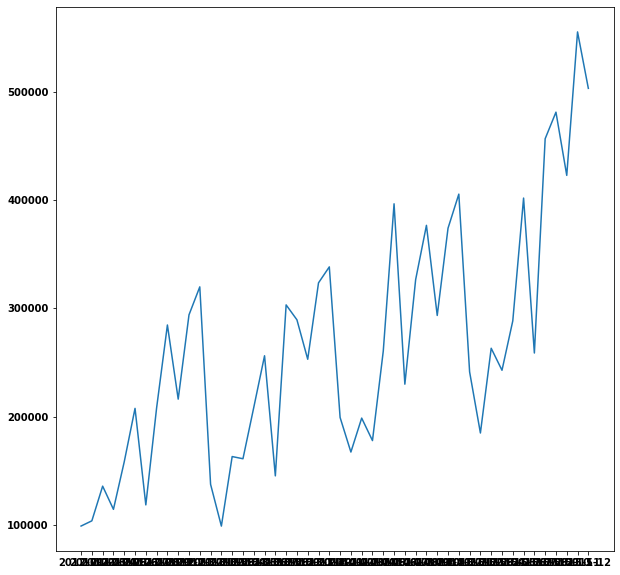

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df_monthly["month"],df_monthly["Sales"])
print(df_monthly['Sales'].nlargest(3))
print(df_monthly.loc[df_monthly['Sales'].isin(df_monthly['Sales'].nlargest(3)), 'month'])

In [ ]:
print('Unique percent of Order ID :' ,(len(data['Order ID'].unique())/len(data['Order ID'])) * 100)
print('Unique percent of Customer ID :' ,(len(data['Customer ID'].unique())/len(data['Customer ID'])) * 100)
print('Unique percent of Product ID :' ,(len(data['Product ID'].unique())/len(data['Product ID'])) * 100)

Unique percent of Order ID : 50.16182491713784
Unique percent of Customer ID : 33.95398713199454
Unique percent of Product ID : 7.385455254435562


From the above output it is evident that

Order ID has a **comparitively higher grained** dataset,

Customer ID has a **comparitively moderately grained** dataset and

Product ID is **more coarse.**

No. of unique customer catered in the last 4 years 17415
percent_single_order_customers =  68.78552971576227
percent_repeat_order_customers =  31.214470284237727
1    68.785530
2    19.908125
3     7.527993
4     2.624175
5     0.907264
6     0.166523
7     0.068906
8     0.005742
9     0.005742
Name: Order ID, dtype: float64


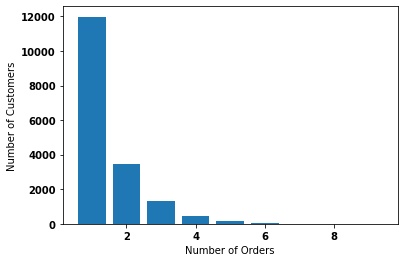

In [ ]:
# Group the orders by customer ID and count the number of orders for each customer
order_counts = data.groupby('Customer ID')['Order ID'].nunique()

single_order_customers = order_counts.value_counts()[1]
repeat_order_customers = len(order_counts) - single_order_customers

print('No. of unique customer catered in the last 4 years',len(order_counts))
print('percent_single_order_customers = ',(single_order_customers / len(order_counts)) * 100)
print('percent_repeat_order_customers = ',(repeat_order_customers / len(order_counts))*100)

customer_counts = order_counts.value_counts().sort_index()

percent_customers = customer_counts / customer_counts.sum() * 100
print(percent_customers)

plt.bar(customer_counts.index, customer_counts)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
df_sub_cat = data.groupby('Sub-Category').agg(
    total_sales=('Sales','sum'),
    total_quantity=('Quantity','sum'),
    avg_discount=('Discount','mean'),
    total_profit=('Profit','sum'),
    total_Shipping_cost=('Shipping Cost','sum')
    )
df_sub_cat = df_sub_cat.reset_index()

df_sub_cat

Sub-Category   total_sales  total_quantity  avg_discount  total_profit  \
0   Accessories  7.492370e+05           10946      0.120481  129626.30620   
1    Appliances  1.010536e+06            6026      0.142078  141562.58770   
2           Art  3.716132e+05           16215      0.117574   57829.85930   
3       Binders  4.618694e+05           21403      0.179284   72433.15160   
4     Bookcases  1.466572e+06            8310      0.153758  161924.41950   
5        Chairs  1.501682e+06           12336      0.163110  140396.26750   
6       Copiers  1.509436e+06            7454      0.117147  258567.54818   
7     Envelopes  1.692175e+05            8210      0.132891   28849.48730   
8     Fasteners  8.949505e+04            9051      0.137193   13844.28890   
9   Furnishings  3.851560e+05           11163      0.150628   46845.43190   
10       Labels  7.335028e+04            9301      0.120527   14988.92370   
11     Machines  7.790601e+05            4906      0.169583   58867.87300   
12        Paper  2.417875e+05           12672      0.110109   58111.65350   
13       Phones  1.706824e+06           11870      0.145847  216717.00580   
14      Storage  1.126813e+06           16884      0.138540  108416.68060   
15     Supplies  2.428111e+05            8482      0.128043   22559.19530   
16       Tables  7.570419e+05            3083      0.290732  -64083.38870   

    total_Shipping_cost  
0            83592.3340  
1           108307.7460  
2            41889.0820  
3            49773.1020  
4           155487.9670  
5           164253.3520  
6           159501.2049  
7            18582.9680  
8            10300.0680  
9            40981.6560  
10            8840.7250  
11           79149.8485  
12           26864.0850  
13          184953.4920  
14          120793.8520  
15           24950.8270  
16           79863.3940

In [ ]:
df_sub_cat.describe()

total_sales  total_quantity  avg_discount   total_profit  \
count  1.700000e+01       17.000000     17.000000      17.000000   
mean   7.436766e+05    10488.941176      0.148090   86321.017134   
std    5.526694e+05     4583.551563      0.041671   81075.098548   
min    7.335028e+04     3083.000000      0.110109  -64083.388700   
25%    2.428111e+05     8210.000000      0.120527   28849.487300   
50%    7.492370e+05     9301.000000      0.138540   58867.873000   
75%    1.126813e+06    12336.000000      0.153758  140396.267500   
max    1.706824e+06    21403.000000      0.290732  258567.548180   

       total_Shipping_cost  
count            17.000000  
mean          79887.394318  
std           59186.033713  
min            8840.725000  
25%           26864.085000  
50%           79149.848500  
75%          120793.852000  
max          184953.492000

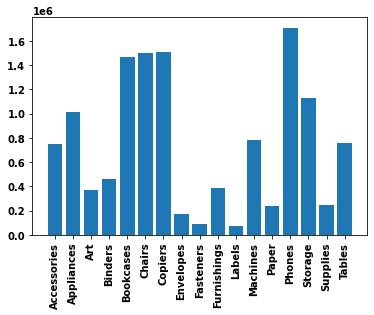

13    1.706824e+06
6     1.509436e+06
5     1.501682e+06
Name: total_sales, dtype: float64
5      Chairs
6     Copiers
13     Phones
Name: Sub-Category, dtype: object


In [ ]:
plt.bar(df_sub_cat["Sub-Category"],df_sub_cat["total_sales"])
plt.xticks(df_sub_cat["Sub-Category"], rotation='vertical')
plt.show()
print(df_sub_cat['total_sales'].nlargest(3))
print(df_sub_cat.loc[df_sub_cat['total_sales'].isin(df_sub_cat['total_sales'].nlargest(3)), 'Sub-Category'])

In [ ]:
df_market = data.groupby('Market')['Sales'].sum().sort_values(ascending=False)
print(df_market)
print('The Biggest Market is',df_market.idxmax())
df_mp = data.groupby(['Market','Product Name'])['Sales'].sum()
print('Top 3 products',df_mp.groupby('Market').nlargest(3))


Market
Asia Pacific    4.042658e+06
Europe          3.287336e+06
USCA            2.364129e+06
LATAM           2.164605e+06
Africa          7.837732e+05
Name: Sales, dtype: float64
The Biggest Market is Asia Pacific
Top 3 products Market        Market        Product Name                                                               
Africa        Africa        Apple Smart Phone, Full Size                                                   16946.4060
                            Cisco Smart Phone, Cordless                                                     8404.0920
                            Cisco Smart Phone, Full Size                                                    7369.7370
Asia Pacific  Asia Pacific  Motorola Smart Phone, Full Size                                                40119.5520
                            Nokia Smart Phone, with Caller ID                                              31063.8042
                            Cisco Smart Phone, Full Size                    

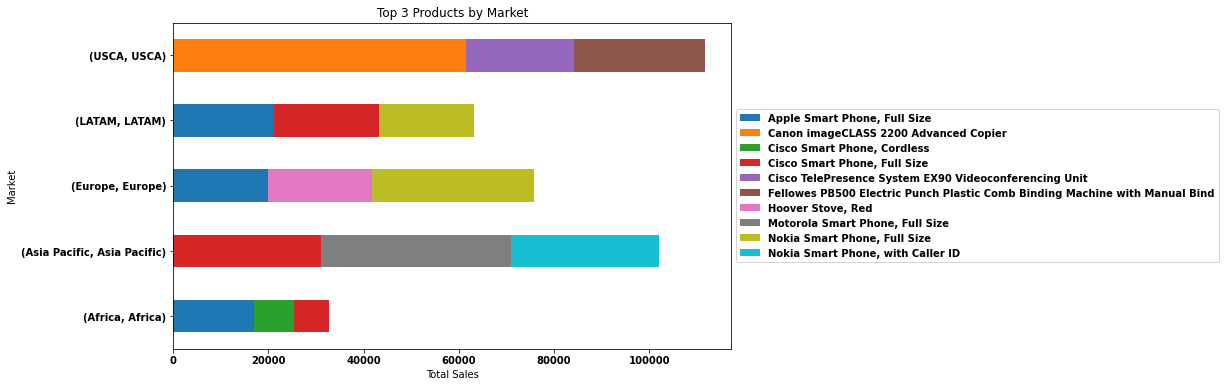

In [ ]:
# Get top 3 products by market
df_mp = data.groupby(['Market','Product Name'])['Sales'].sum()
top_products = df_mp.groupby('Market').nlargest(3).unstack()

# Create stacked bar chart
ax = top_products.plot(kind='barh', stacked=True, figsize=(10,6))

ax.set_xlabel('Total Sales')
ax.set_ylabel('Market')
ax.set_title('Top 3 Products by Market')

# Move legend outside chart area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


              num_orders  % of Orders
Days to Ship                         
0                   1292     5.021766
1                    840     3.264925
2                   3562    13.844838
3                   2565     9.969683
4                   7213    28.035603
5                   5598    21.758396
6                   3124    12.142413
7                   1555     6.043999


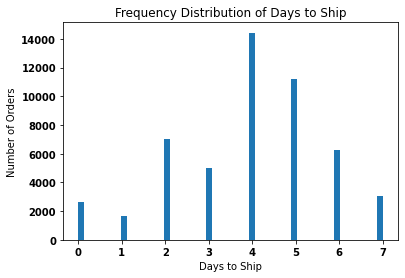

In [ ]:
# Convert order date and ship date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculate number of days between order date and ship date
data['Days to Ship'] = (data['Ship Date'] - data['Order Date']).dt.days

freq_dist = data.groupby('Days to Ship').agg(num_orders=('Order ID', 'nunique'))

# Calculate percentage of orders that took each number of days to ship
freq_dist['% of Orders'] = freq_dist['num_orders'] /data['Order ID'].nunique()* 100

print(freq_dist)

plt.hist(data['Days to Ship'], bins=50)
plt.xlabel('Days to Ship')
plt.ylabel('Number of Orders')
plt.title('Frequency Distribution of Days to Ship')
plt.show()

In [ ]:
# Convert order date and ship date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculate number of days between order date and ship date
data['Days to Ship'] = (data['Ship Date'] - data['Order Date']).dt.days

# Calculate frequency distribution of days to ship
freq_dist = data.groupby('Days to Ship').agg(num_orders=('Order ID', 'nunique'))
freq_dist['% of Orders'] = freq_dist['num_orders'] / data['Order ID'].nunique() * 100

# Identify top 10 orders that took the longest time to ship
longest_shipment_orders = data.sort_values('Days to Ship', ascending=False).head(10)[['Order ID', 'Days to Ship', 'Market', 'Category', 'Sub-Category', 'Product Name', 'Sales']]
print('Top 10 orders with longest shipment times:')
print(longest_shipment_orders)

# Compare frequency distribution of days to ship across different markets
market_freq_dist = data.groupby(['Market', 'Days to Ship']).agg(num_orders=('Order ID', 'nunique'))
market_freq_dist['% of Orders'] = market_freq_dist['num_orders'] / market_freq_dist.groupby('Market')['num_orders'].transform('sum') * 100
market_freq_dist = market_freq_dist.reset_index()

Top 10 orders with longest shipment times:
                       Order ID  Days to Ship        Market         Category  \
39140  ID-2012-RD19660144-40914             7  Asia Pacific  Office Supplies   
45325    RO-2015-AF885107-42202             7        Europe        Furniture   
45277   RS-2014-PH8790108-41951             7        Europe  Office Supplies   
21656   ES-2012-VW2177544-41147             7        Europe  Office Supplies   
45292   IZ-2014-SC1002061-41962             7  Asia Pacific  Office Supplies   
32475    IN-2015-AR103457-42267             7  Asia Pacific  Office Supplies   
45304    ID-2015-TB215207-42286             7  Asia Pacific       Technology   
45306   MX-2014-TB2125093-41703             7         LATAM  Office Supplies   
32442  MX-2014-CR12820143-41811             7         LATAM  Office Supplies   
32439   MX-2012-CS1195036-41145             7         LATAM  Office Supplies   

      Sub-Category                                  Product Name     Sales  

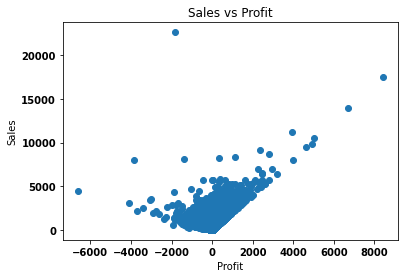

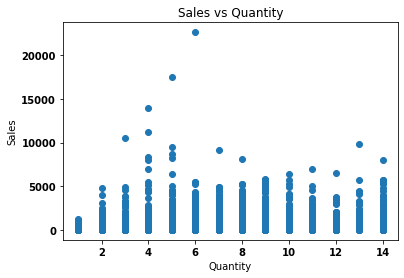

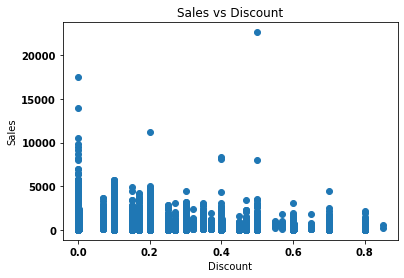

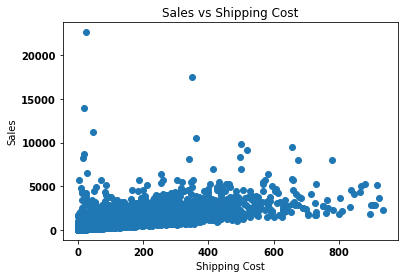

                  Sales    Profit  Quantity  Discount  Shipping Cost
Sales          1.000000  0.484918  0.313577 -0.086722       0.767835
Profit         0.484918  1.000000  0.104365 -0.316490       0.354423
Quantity       0.313577  0.104365  1.000000 -0.019875       0.271804
Discount      -0.086722 -0.316490 -0.019875  1.000000      -0.078153
Shipping Cost  0.767835  0.354423  0.271804 -0.078153       1.000000


In [ ]:
plt.scatter(data['Profit'], data['Sales'])
plt.ylabel('Sales')
plt.xlabel('Profit')
plt.title('Sales vs Profit')
plt.show()

plt.scatter(data['Quantity'], data['Sales'])
plt.ylabel('Sales')
plt.xlabel('Quantity')
plt.title('Sales vs Quantity')
plt.show()

plt.scatter(data['Discount'], data['Sales'])
plt.ylabel('Sales')
plt.xlabel('Discount')
plt.title('Sales vs Discount')
plt.show()

plt.scatter(data['Shipping Cost'], data['Sales'])
plt.ylabel('Sales')
plt.xlabel('Shipping Cost')
plt.title('Sales vs Shipping Cost')
plt.show()
# Calculate correlation coefficients between Sales and other numerical variables
print(data[['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Cost']].corr())

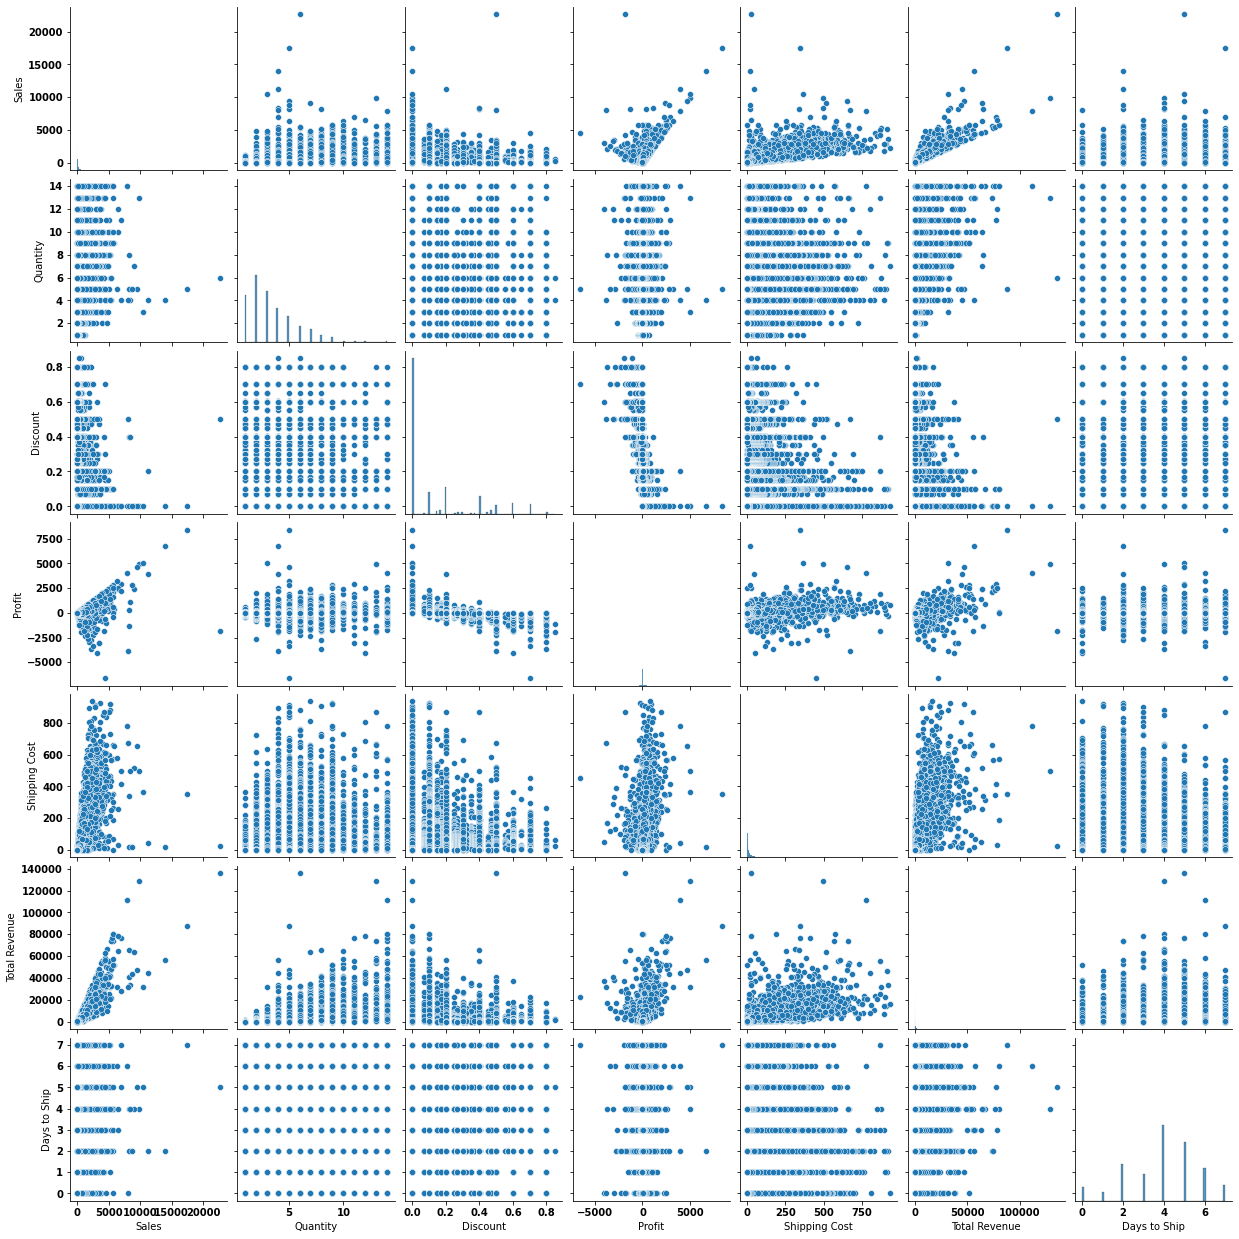

In [ ]:
sns.pairplot(data)

In [ ]:
print("Average Sales by Sub-Category:\n", data.groupby('Sub-Category')['Sales'].mean(),"\n")
print("Median Sales by Sub-Category:\n", data.groupby('Sub-Category')['Sales'].median(),"\n")

print("Average Sales by Segment:\n", data.groupby('Segment')['Sales'].mean(),"\n")
print("Median Sales by Segment:\n", data.groupby('Segment')['Sales'].median(),"\n")

print("Average Sales by Market:\n", data.groupby('Market')['Sales'].mean(),"\n")
print("Median Sales by Market:\n", data.groupby('Market')['Sales'].median(),"\n")

print("Average Sales by Category:\n", data.groupby('Category')['Sales'].mean(),"\n")
print("Median Sales by Category:\n", data.groupby('Category')['Sales'].median()),"\n"

print("Average Sales by Region:\n", data.groupby('Region')['Sales'].mean(),"\n")
print("Median Sales by Region:\n", data.groupby('Region')['Sales'].median(),"\n")

Average Sales by Sub-Category:
 Sub-Category
Accessories    243.654315
Appliances     580.100761
Art             76.400731
Binders         75.149592
Bookcases      608.283800
Chairs         437.298126
Copiers        679.008670
Envelopes       70.891282
Fasteners       34.407938
Furnishings    122.116667
Labels          28.200798
Machines       524.266532
Paper           69.240414
Phones         508.437337
Storage        223.175474
Supplies       100.877080
Tables         879.258913
Name: Sales, dtype: float64 

Median Sales by Sub-Category:
 Sub-Category
Accessories    132.5000
Appliances     251.4825
Art             50.1000
Binders         28.2300
Bookcases      411.3320
Chairs         258.0000
Copiers        487.3800
Envelopes       48.0321
Fasteners       25.8660
Furnishings     73.7200
Labels          20.6500
Machines       305.1450
Paper           43.8180
Phones         273.3000
Storage        113.8200
Supplies        63.3615
Tables         629.0640
Name: Sales, dtype: float64 

A

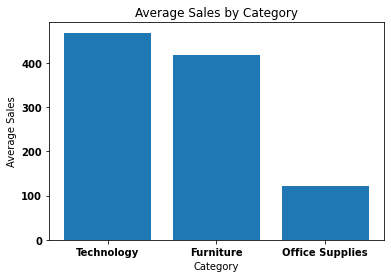

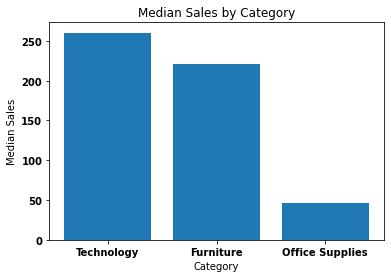

In [ ]:
import matplotlib.pyplot as plt

# Average sales by category
avg_sales_cat = data.groupby('Category')['Sales'].mean().sort_values(ascending=False)
plt.bar(avg_sales_cat.index, avg_sales_cat.values)
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.show()

# Median sales by category
med_sales_cat = data.groupby('Category')['Sales'].median().sort_values(ascending=False)
plt.bar(med_sales_cat.index, med_sales_cat.values)
plt.title('Median Sales by Category')
plt.xlabel('Category')
plt.ylabel('Median Sales')
plt.show()


#Section 5

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year

grouped_data = data.groupby(['Customer ID', 'Year'])['Quantity'].sum().reset_index()

pivoted_data = grouped_data.pivot(index='Customer ID', columns='Year', values='Quantity').fillna(0)

pivoted_data['Change'] = pivoted_data[2015] - pivoted_data[2012]

increased_customers = pivoted_data[pivoted_data['Change'] >= 0]

percent_increased = len(increased_customers) / len(pivoted_data) * 100

print(f"{percent_increased:.2f}% of customers increased their order volumes over the 4 years")


79.45% of customers increased their order volumes over the 4 years


13837 out of 17415 customers (79.45%) increased their order volumes over the 4 years


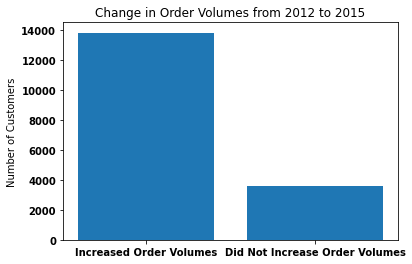

In [ ]:
import matplotlib.pyplot as plt

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year

grouped_data = data.groupby(['Customer ID', 'Year'])['Quantity'].sum().reset_index()

pivoted_data = grouped_data.pivot(index='Customer ID', columns='Year', values='Quantity').fillna(0)

pivoted_data['Change'] = pivoted_data[2015] - pivoted_data[2012]

increased_customers = pivoted_data[pivoted_data['Change'] >= 0]

percent_increased = len(increased_customers) / len(pivoted_data) * 100

# Print results
print(f"{len(increased_customers)} out of {len(pivoted_data)} customers ({percent_increased:.2f}%) increased their order volumes over the 4 years")

# Create bar chart to visualize results
plt.bar(['Increased Order Volumes', 'Did Not Increase Order Volumes'], [len(increased_customers), len(pivoted_data)-len(increased_customers)])
plt.title('Change in Order Volumes from 2012 to 2015')
plt.ylabel('Number of Customers')
plt.show()


79.45% of customers increased their order volumes over the 4 years


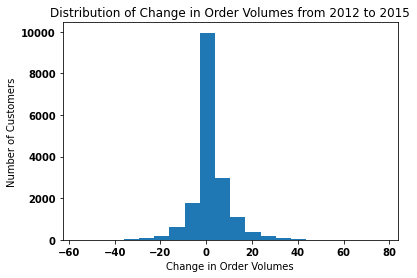

In [ ]:
import matplotlib.pyplot as plt

# Group data by customer and year and calculate the sum of quantities
grouped_data = data.groupby(['Customer ID', 'Year'])['Quantity'].sum().reset_index()

# Pivot data to have years as columns and customers as rows
pivoted_data = grouped_data.pivot(index='Customer ID', columns='Year', values='Quantity').fillna(0)

# Calculate the difference in quantities between 2012 and 2015
pivoted_data['Change'] = pivoted_data[2015] - pivoted_data[2012]

# Calculate the percentage of customers who increased their order volumes
increased_customers = pivoted_data[pivoted_data['Change'] >= 0]
percent_increased = len(increased_customers) / len(pivoted_data) * 100

# Print the percentage of customers who increased their order volumes
print(f"{percent_increased:.2f}% of customers increased their order volumes over the 4 years")

# Create a histogram of the change in order volumes
plt.hist(pivoted_data['Change'], bins=20)
plt.xlabel('Change in Order Volumes')
plt.ylabel('Number of Customers')
plt.title('Distribution of Change in Order Volumes from 2012 to 2015')
plt.show()


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year

grouped_data = data.groupby(['Customer ID', 'Year'])['Quantity'].sum().reset_index()

pivoted_data = grouped_data.pivot(index='Customer ID', columns='Year', values='Quantity').fillna(0)

pivoted_data['Net Change'] = pivoted_data[2015] - pivoted_data[2012]

increased_customers = pivoted_data[pivoted_data['Net Change'] >= 0]

percent_increased = len(increased_customers) / len(pivoted_data) * 100

print(f"{percent_increased:.2f}% of customers increased their order volumes over the 4 years")
print(f"The overall net change in order volume was {pivoted_data['Net Change'].sum()}")


79.45% of customers increased their order volumes over the 4 years
The overall net change in order volume was 29179.0


In [ ]:
increased_data = data[data['Customer ID'].isin(increased_customers.index)]
average_order_value = increased_data.groupby(['Customer ID'])['Sales'].mean()
median_order_value = increased_data.groupby(['Customer ID'])['Sales'].median()

# calculate the average and median order frequency for the increased customers
order_frequency = increased_data.groupby(['Customer ID'])['month'].nunique()
average_order_frequency = order_frequency.mean()
median_order_frequency = order_frequency.median()


print("Average order value for increased customers:")
print(average_order_value)
print("\nMedian order value for increased customers:")
print(median_order_value)
print("\nAverage order frequency for increased customers:")
print(average_order_frequency)
print("\nMedian order frequency for increased customers:")
print(median_order_frequency)


Average order value for increased customers:
Customer ID
AA-10315120     2713.410000
AA-10315139      227.369077
AA-103151402     796.758667
AA-1031545       368.271000
AA-1031548        68.148000
                   ...     
ZD-2192518       872.320000
ZD-2192527       445.326000
ZD-2192545       437.212875
ZD-2192582       339.050700
ZD-2192596       134.655000
Name: Sales, Length: 13837, dtype: float64

Median order value for increased customers:
Customer ID
AA-10315120     2713.41000
AA-10315139      159.48000
AA-103151402     202.33000
AA-1031545       368.27100
AA-1031548        68.14800
                   ...    
ZD-2192518       872.32000
ZD-2192527       445.32600
ZD-2192545       402.01125
ZD-2192582       339.05070
ZD-2192596       134.65500
Name: Sales, Length: 13837, dtype: float64

Average order frequency for increased customers:
1.410493604104936

Median order frequency for increased customers:
1.0


In [ ]:
data['profit_per_sale'] = data['Profit'] / data['Sales']

product_profit = data.groupby('Product Name')['profit_per_sale']
sorted_products = product_profit.mean().sort_values(ascending=False).head(10)

print(sorted_products)

Product Name
Tops Green Bar Computer Printout Paper                                                   0.50
Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book    0.50
Southworth Structures Collection                                                         0.50
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier                    0.50
Xerox 1890                                                                               0.50
Avery 475                                                                                0.50
Avery 5                                                                                  0.49
Xerox 1918                                                                               0.49
Xerox 1987                                                                               0.49
Color-Coded Legal Exhibit Labels                                                         0.49
Name: profit_per_sale, dtype: float64


                                            Product Name  Discount  \
0      "While you Were Out" Message Book, One Form pe...      0.00   
1                              Okidata Card Printer, Red      0.00   
2                       Crayola Anti Dust Chalk, 12/Pack      0.00   
3                            Okidata Card Printer, White      0.00   
4                                          Crate-A-Files      0.00   
...                                                  ...       ...   
15216                GBC White Gloss Covers, Plain Front      0.80   
15217                              GBC VeloBinder Strips      0.80   
15218                  Hon Conference Table, Rectangular      0.80   
15219            Bevis Conference Table, Fully Assembled      0.85   
15220           Chromcraft Coffee Table, Fully Assembled      0.85   

             Sales      Profit  
0         7.420000     3.71000  
1       475.695000    88.39125  
2        10.920000     4.91400  
3       574.992000   209.72

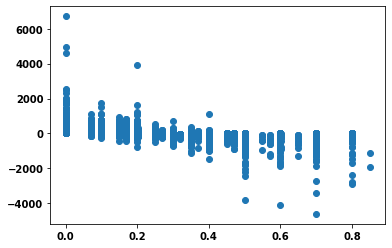

In [ ]:
grouped = data.groupby(['Product Name', 'Discount']).agg({'Sales': 'mean', 'Profit': 'mean'})

grouped = grouped.sort_values(by='Discount', ascending=True).reset_index()

print(grouped)

plt.scatter(grouped['Discount'],grouped['Profit'])


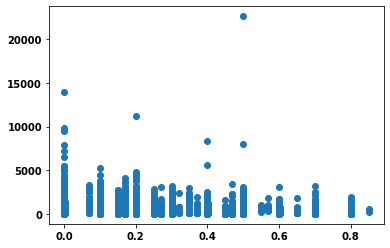

In [ ]:
plt.scatter(grouped['Discount'],grouped['Sales'])


Correlation coefficient between Discount and Profit: -0.37


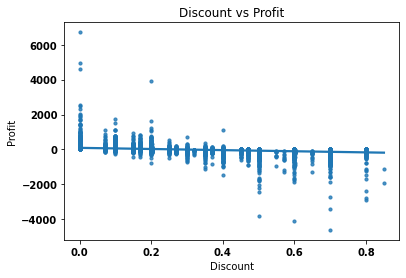

In [ ]:
# Group the data by Product Name and Discount and calculate mean Sales and Profit
grouped = data.groupby(['Product Name', 'Discount']).agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Sort the data by Discount in ascending order
grouped = grouped.sort_values(by='Discount', ascending=True)

# Plot a scatter plot of Discount vs Profit with a regression line
sns.regplot(x='Discount', y='Profit', data=grouped, scatter_kws={'s': 10})
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

# Calculate the correlation coefficient between Discount and Profit
corr = grouped['Discount'].corr(grouped['Profit'])
print(f"Correlation coefficient between Discount and Profit: {corr:.2f}")


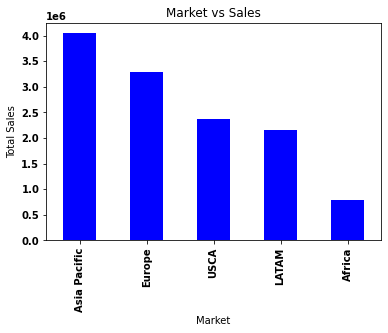

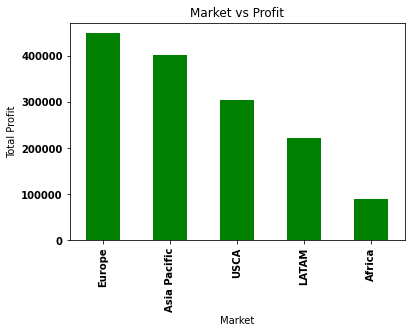

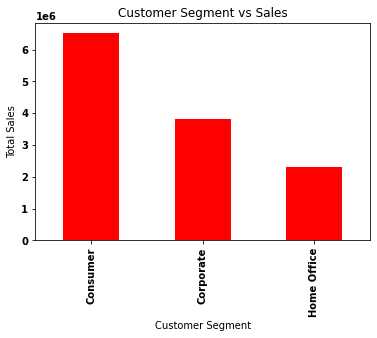

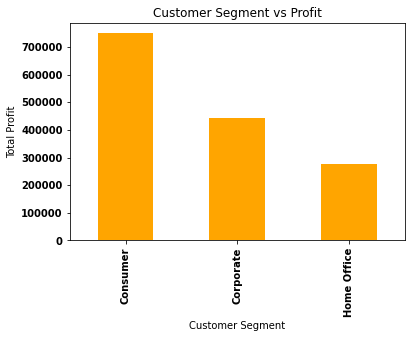

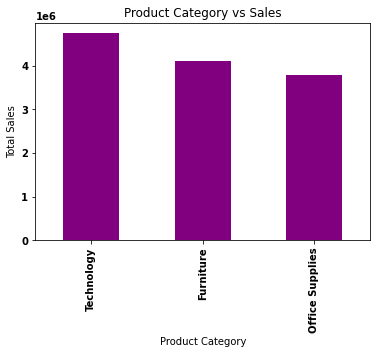

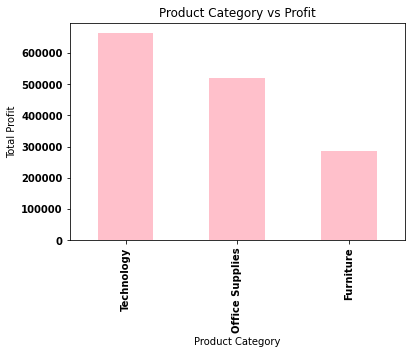

In [ ]:
# Market vs Sales chart
market_sales = data.groupby('Market')['Sales'].sum().sort_values(ascending=False)
market_sales.plot(kind='bar', color='blue')
plt.title('Market vs Sales')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.show()

# Market vs Profit chart
market_profit = data.groupby('Market')['Profit'].sum().sort_values(ascending=False)
market_profit.plot(kind='bar', color='green')
plt.title('Market vs Profit')
plt.xlabel('Market')
plt.ylabel('Total Profit')
plt.show()

# Customer Segment vs Sales chart
segment_sales = data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales.plot(kind='bar', color='red')
plt.title('Customer Segment vs Sales')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

# Customer Segment vs Profit chart
segment_profit = data.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
segment_profit.plot(kind='bar', color='orange')
plt.title('Customer Segment vs Profit')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.show()

# Product Category vs Sales chart
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='purple')
plt.title('Product Category vs Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

# Product Category vs Profit chart
category_profit = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit.plot(kind='bar', color='pink')
plt.title('Product Category vs Profit')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()


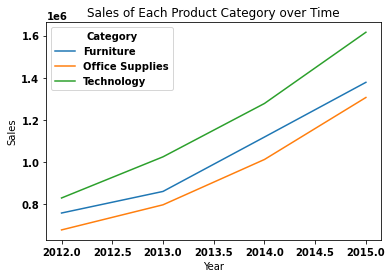

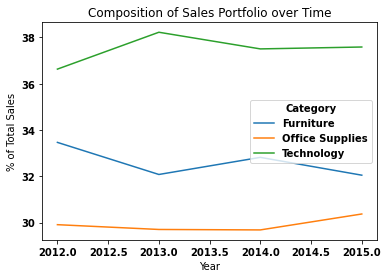

In [ ]:
grouped_sales = data.groupby(['Year', 'Category']).agg({'Sales': 'sum'})
grouped_sales_pct = grouped_sales.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
pivot_sales = grouped_sales.reset_index().pivot(index='Year', columns='Category', values='Sales')
pivot_sales_pct = grouped_sales_pct.reset_index().pivot(index='Year', columns='Category', values='Sales')

pivot_sales.plot.line()
plt.title('Sales of Each Product Category over Time')
plt.ylabel('Sales')
plt.show()

pivot_sales_pct.plot.line()
plt.title('Composition of Sales Portfolio over Time')
plt.ylabel('% of Total Sales')
plt.show()


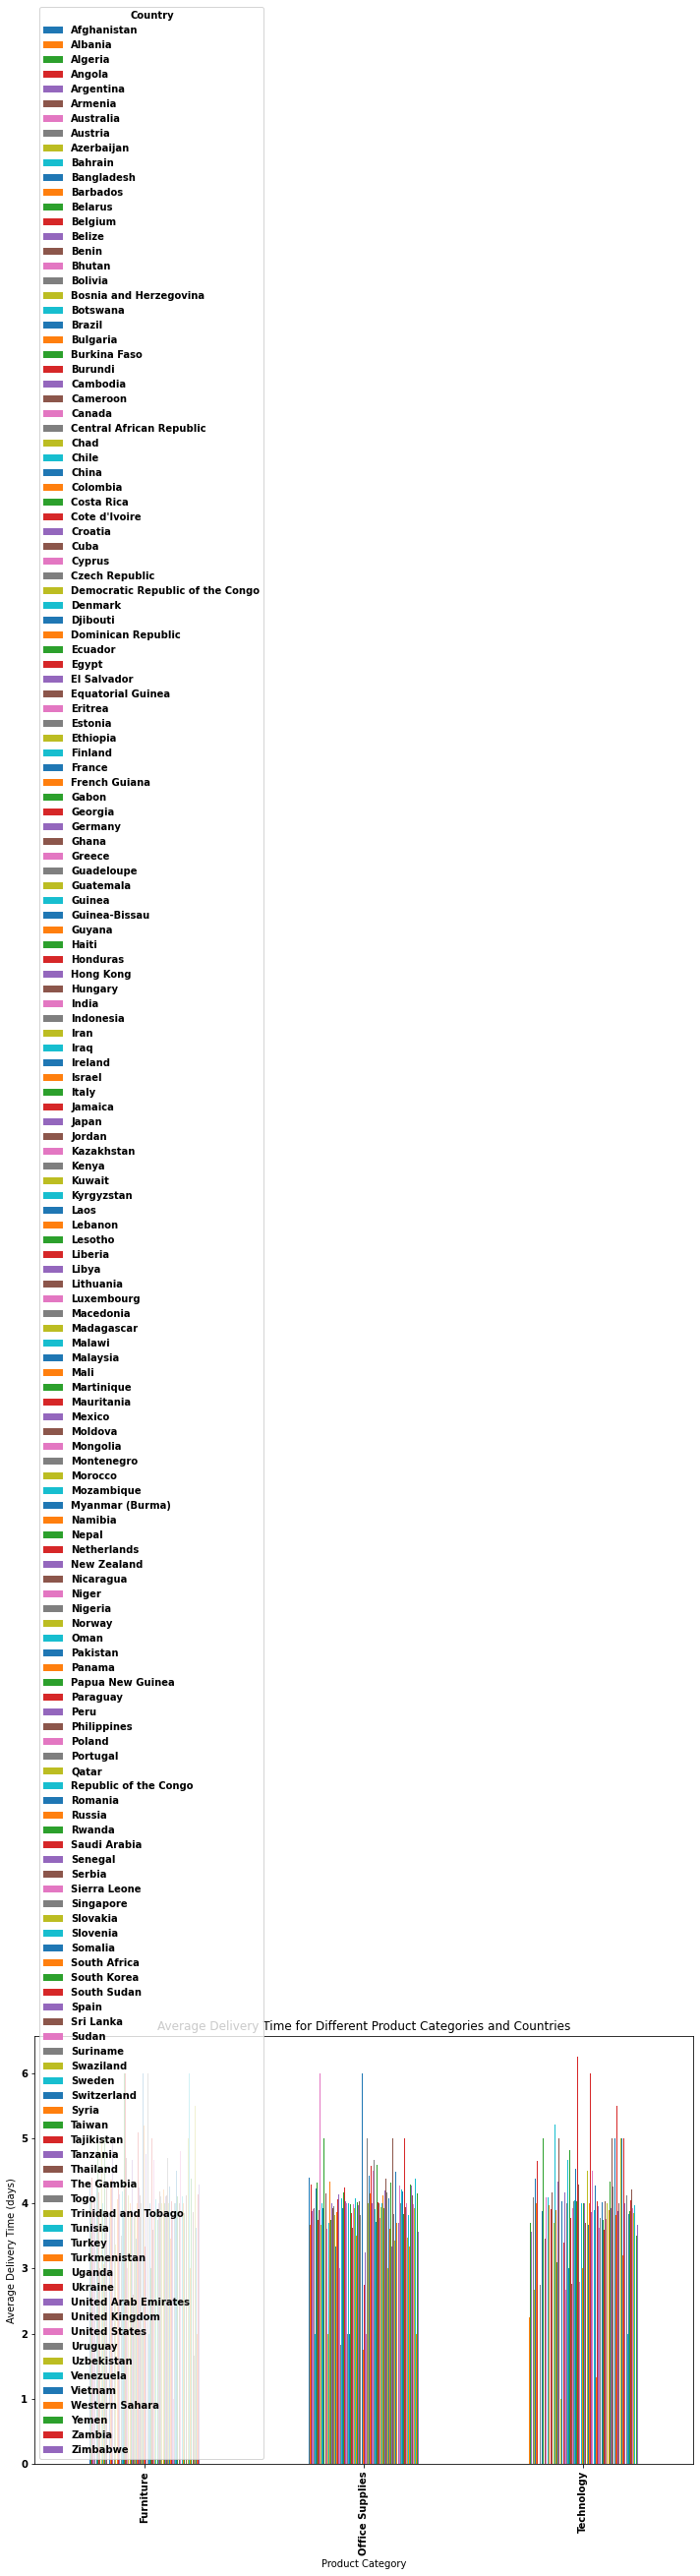

mean  median
Category   Country     Ship Mode                       
Furniture  Afghanistan First Class     2.666667     3.0
                       Second Class    5.000000     5.0
                       Standard Class  4.777778     4.0
           Albania     Standard Class  5.333333     5.0
           Algeria     First Class     2.571429     3.0
...                                         ...     ...
Technology Zambia      Standard Class  5.400000     5.5
           Zimbabwe    First Class     2.000000     2.0
                       Same Day        0.000000     0.0
                       Second Class    3.000000     3.0
                       Standard Class  4.666667     4.5

[1337 rows x 2 columns]

In [ ]:
grouped_ship_delay = data.groupby(['Category', 'Country', 'Ship Mode'])['Days to Ship'].agg(['mean', 'median'])
pt_delivery_time = pd.pivot_table(data, values='Days to Ship', index=['Category'], columns=['Country'], aggfunc='mean')


# create a bar chart
pt_delivery_time.plot(kind='bar', figsize=(12, 8))
plt.title('Average Delivery Time for Different Product Categories and Countries')
plt.xlabel('Product Category')
plt.ylabel('Average Delivery Time (days)')
plt.show()
grouped_ship_delay

Top 10 delivery time by mean:
                                            mean  median
Category        Country    Ship Mode                   
Furniture       Uzbekistan Standard Class  6.00     7.0
                Laos       Standard Class  6.00     6.0
Technology      Uruguay    Standard Class  6.00     6.0
Office Supplies Belize     Standard Class  6.00     6.0
                Armenia    Standard Class  6.00     6.0
                Laos       Standard Class  6.00     6.0
Furniture       Tunisia    Standard Class  6.00     6.0
Technology      Jamaica    Standard Class  6.25     7.0
Office Supplies Namibia    Standard Class  7.00     7.0
Furniture       Syria      Standard Class  7.00     7.0

Least 10 delivery time by mean:
                                                 mean  median
Category        Country              Ship Mode              
Technology      Japan                Same Day    0.0     0.0
Furniture       Turkey               Same Day    0.0     0.0
                Ind

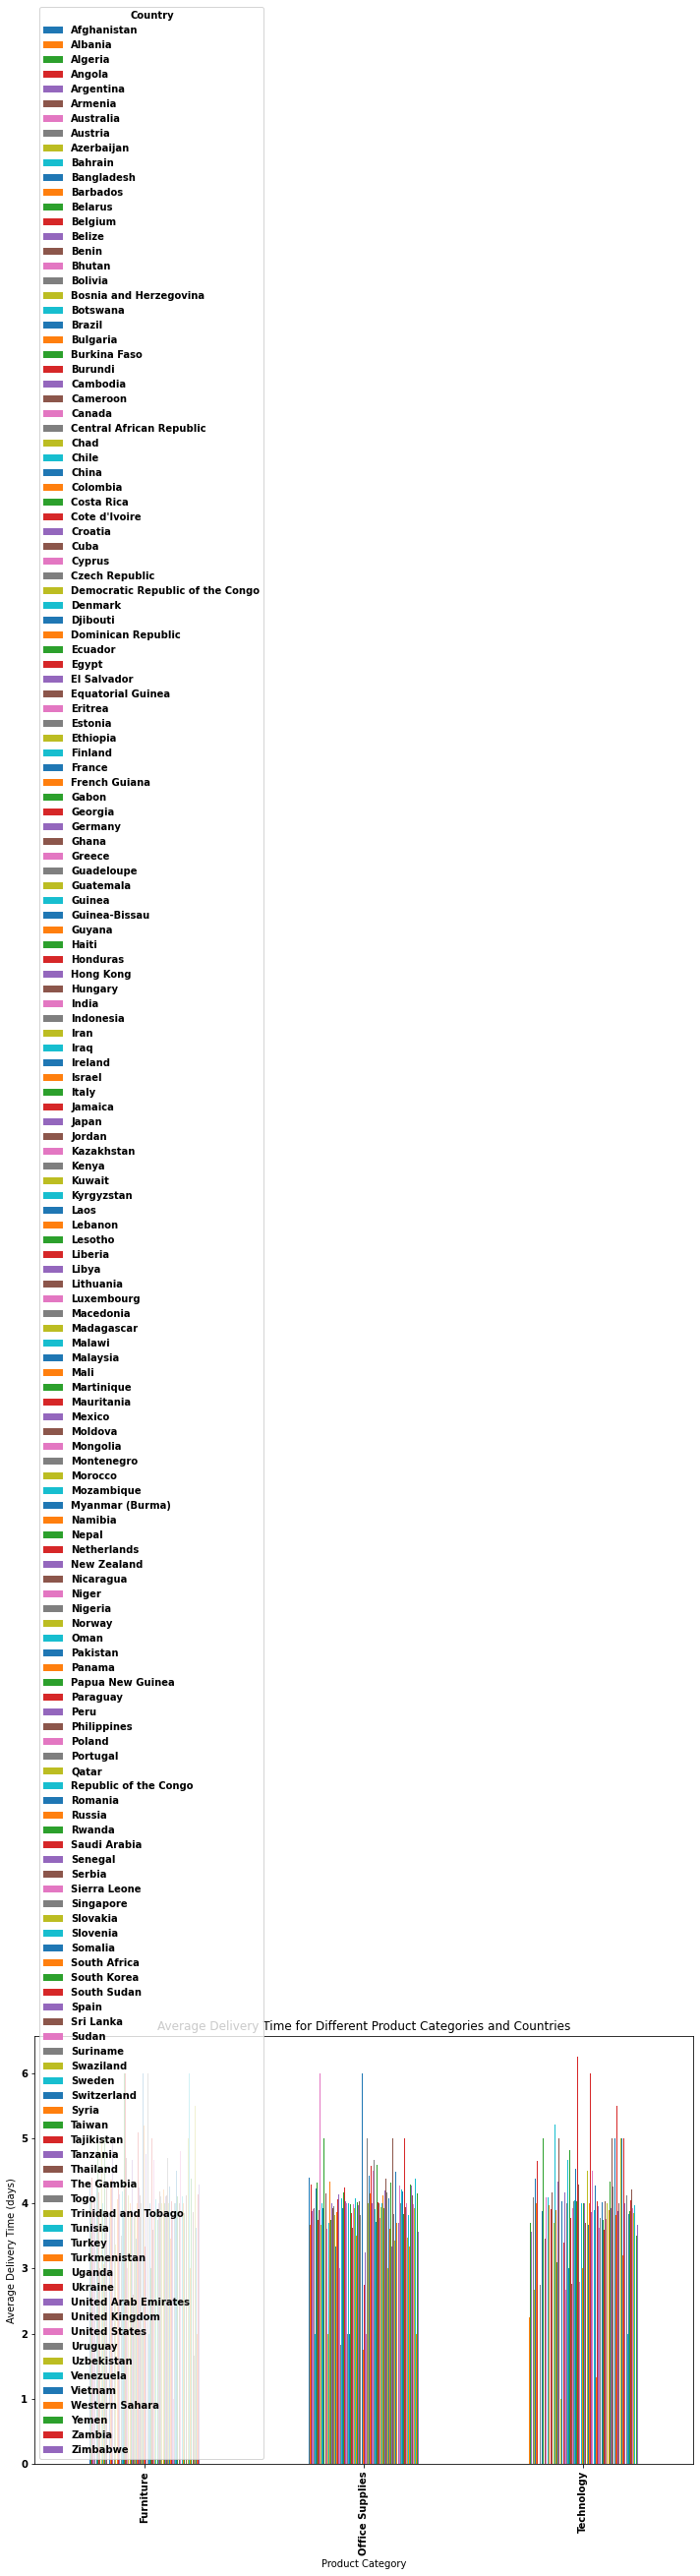

In [ ]:
# group data by Category, Country, and Ship Mode and calculate the mean and median Days to Ship
grouped_ship_delay = data.groupby(['Category', 'Country', 'Ship Mode'])['Days to Ship'].agg(['mean', 'median'])

# sort the data by mean Days to Ship in ascending order
grouped_ship_delay_sorted = grouped_ship_delay.sort_values(by='mean', ascending=True)

# get the top and bottom 10 records based on mean Days to Ship
top_10 = grouped_ship_delay_sorted.tail(10)
least_10 = grouped_ship_delay_sorted.head(10)

# print the results
print("Top 10 delivery time by mean:\n", top_10)
print("\nLeast 10 delivery time by mean:\n", least_10)

# create a pivot table for the mean Days to Ship by Category and Country
pt_delivery_time = pd.pivot_table(data, values='Days to Ship', index=['Category'], columns=['Country'], aggfunc='mean')

# create a bar chart for the pivot table
pt_delivery_time.plot(kind='bar', figsize=(12, 8))
plt.title('Average Delivery Time for Different Product Categories and Countries')
plt.xlabel('Product Category')
plt.ylabel('Average Delivery Time (days)')
plt.show()


<Figure size 864x576 with 0 Axes>

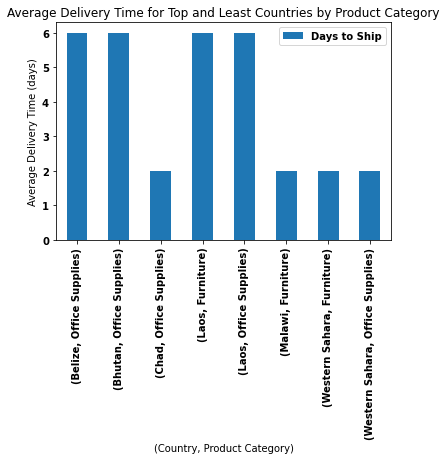

In [ ]:
# calculate average delivery time for each country
avg_delivery_time = data.groupby('Country')['Days to Ship'].mean().sort_values()

# select top and least countries
top_countries = avg_delivery_time.tail(3).index.tolist()
least_countries = avg_delivery_time.head(3).index.tolist()

# create pivot table for top and least countries
top_least_delivery_time = pd.pivot_table(data[data['Country'].isin(top_countries + least_countries)],
                                         values='Days to Ship',
                                         index=['Country', 'Category'],
                                         columns=[],
                                         aggfunc='mean')

# plot the bar chart
plt.figure(figsize=(12, 8))
top_least_delivery_time.plot(kind='bar')
plt.title('Average Delivery Time for Top and Least Countries by Product Category')
plt.xlabel('(Country, Product Category)')
plt.ylabel('Average Delivery Time (days)')
plt.legend(title=None)
plt.show()


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Delivery Time'] = (data['Ship Date'] - data['Order Date']).dt.days

sorted_data = data.groupby(['Category','Country'])['Delivery Time'].mean().reset_index()

# Find the shortest and longest shipping times for each country
shortest_time = sorted_data.groupby('Country')['Delivery Time'].idxmax().reset_index()
longest_time = sorted_data.groupby('Country')['Delivery Time'].idxmax().reset_index()

shortest_time

Country  Delivery Time
0       Afghanistan            304
1           Albania              1
2           Algeria              2
3            Angola              3
4         Argentina              4
..              ...            ...
160         Vietnam            445
161  Western Sahara            139
162           Yemen            301
163          Zambia            141
164        Zimbabwe            142

[165 rows x 2 columns]

# Additional Section:
What are the Top Products in terms of Sales, Profit, Total Revenue & No. of times ordered

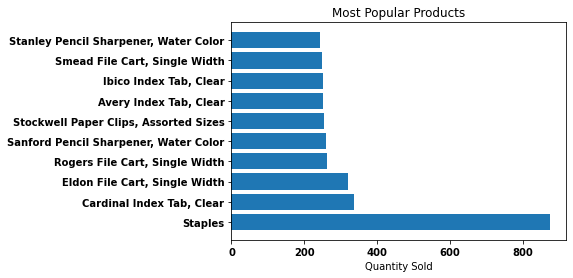

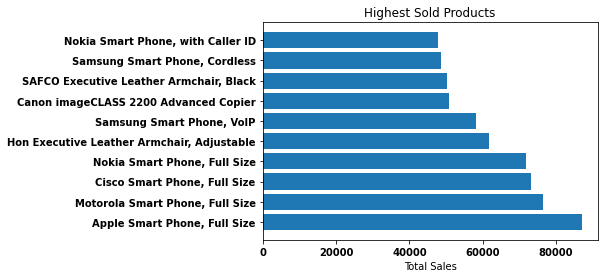

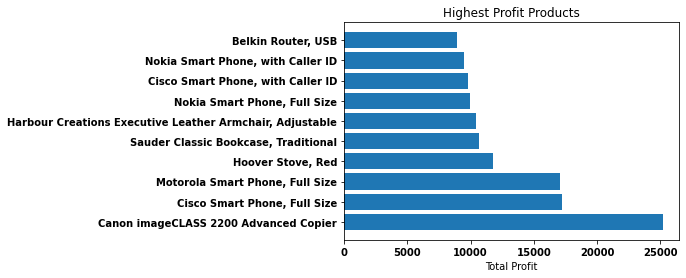

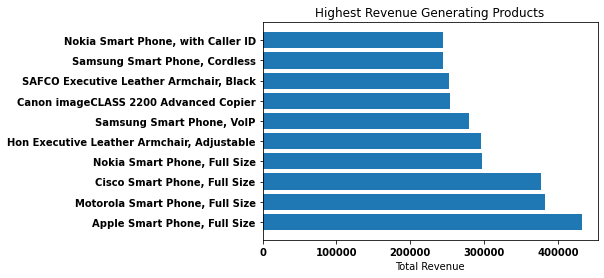

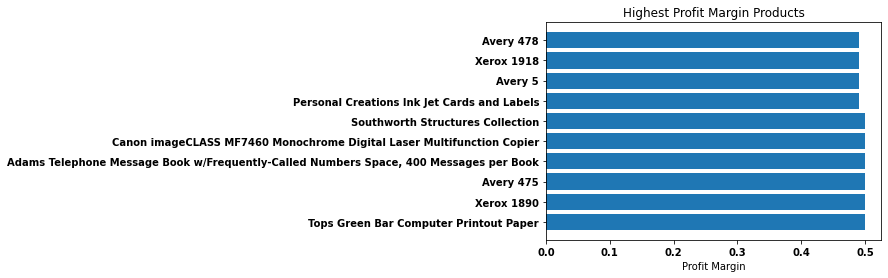

In [ ]:
# Calculate the total sales, profit, and quantity for each product
Product_sales = data.groupby('Product Name')['Sales'].sum().reset_index()
Product_Profit= data.groupby('Product Name')['Profit'].sum().reset_index()
Product_revenue= data.groupby('Product Name')['Total Revenue'].sum().reset_index()
Product_famous= data.groupby('Product Name')['Quantity'].sum().reset_index()
Product_Profit_Margin= data.groupby('Product Name')[['Profit','Sales']].sum().reset_index()
Product_Profit_Margin['Profit_Margin'] = Product_Profit_Margin['Profit'] / Product_Profit_Margin['Sales']

# Sort the products by sales in descending order
most_popular_products = Product_famous.sort_values('Quantity', ascending=False).head(10)
highest_sales_products = Product_sales.sort_values('Sales', ascending=False).head(10)
highest_profit_products = Product_Profit.sort_values('Profit', ascending=False).head(10)
highest_revenue_products = Product_revenue.sort_values('Total Revenue', ascending=False).head(10)
highest_ptofit_margin_products= Product_Profit_Margin.sort_values('Profit_Margin', ascending=False).head(10)


# Plot the results
plt.barh(most_popular_products['Product Name'], most_popular_products['Quantity'])
plt.title('Most Popular Products')
plt.xlabel('Quantity Sold')
plt.show()

plt.barh(highest_revenue_products['Product Name'], highest_sales_products['Sales'])
plt.title('Highest Sold Products')
plt.xlabel('Total Sales')
plt.show()

plt.barh(highest_profit_products['Product Name'], highest_profit_products['Profit'])
plt.title('Highest Profit Products')
plt.xlabel('Total Profit')
plt.show()

plt.barh(highest_revenue_products['Product Name'], highest_revenue_products['Total Revenue'])
plt.title('Highest Revenue Generating Products')
plt.xlabel('Total Revenue')
plt.show()

plt.barh(highest_ptofit_margin_products['Product Name'], highest_ptofit_margin_products['Profit_Margin'])
plt.title('Highest Profit Margin Products')
plt.xlabel('Profit Margin')
plt.show()


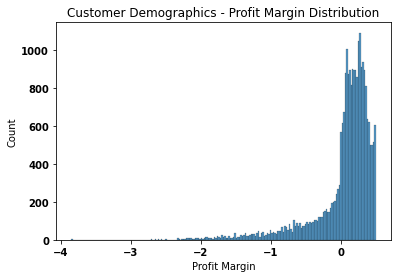

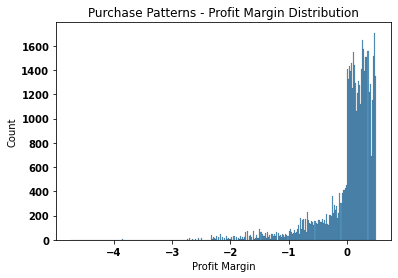

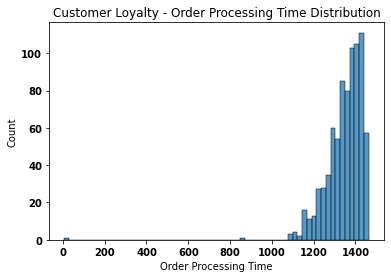

In [ ]:
# Analyze customer demographics
customer_demographics = data.groupby(['Customer Name', 'Segment', 'City', 'State', 'Country']).agg({'Sales': np.sum, 'Profit': np.sum, 'Quantity': np.sum}).reset_index()
customer_demographics['Profit Margin'] = customer_demographics['Profit'] / customer_demographics['Sales']

# Analyze purchase patterns
purchase_patterns = data.groupby(['Customer Name', 'Product Name']).agg({'Sales': np.sum, 'Profit': np.sum, 'Quantity': np.sum}).reset_index()
purchase_patterns['Profit Margin'] = purchase_patterns['Profit'] / purchase_patterns['Sales']

# Analyze customer loyalty
customer_loyalty = data.groupby(['Customer Name']).agg({'Sales': np.sum, 'Order Date': np.min, 'Ship Date': np.max}).reset_index()
customer_loyalty['Order Date'] = pd.to_datetime(customer_loyalty['Order Date'])
customer_loyalty['Ship Date'] = pd.to_datetime(customer_loyalty['Ship Date'])
customer_loyalty['Order Processing Time'] = (customer_loyalty['Ship Date'] - customer_loyalty['Order Date']).dt.days

# Visualize the results
sns.histplot(customer_demographics['Profit Margin'])
plt.title('Customer Demographics - Profit Margin Distribution')
plt.show()

sns.histplot(purchase_patterns['Profit Margin'])
plt.title('Purchase Patterns - Profit Margin Distribution')
plt.show()

sns.histplot(customer_loyalty['Order Processing Time'])
plt.title('Customer Loyalty - Order Processing Time Distribution')
plt.show()


In [ ]:
# Analyze customer demographics
customer_demographics = data.groupby(['Customer Name', 'Segment', 'City', 'State', 'Country']).agg({'Sales': np.sum, 'Profit': np.sum, 'Quantity': np.sum}).reset_index()
customer_demographics['Profit Margin'] = customer_demographics['Profit'] / customer_demographics['Sales']

# Print top 10 customers by profit margin
top10_customers = customer_demographics.nlargest(10, 'Profit Margin')
print('Top 10 customers by profit margin:')
print(top10_customers[['Customer Name', 'Profit Margin']])

# Print bottom 10 customers by profit margin
bottom10_customers = customer_demographics.nsmallest(10, 'Profit Margin')
print('Bottom 10 customers by profit margin:')
print(bottom10_customers[['Customer Name', 'Profit Margin']])

# Analyze purchase patterns
purchase_patterns = data.groupby(['Customer Name', 'Product Name']).agg({'Sales': np.sum, 'Profit': np.sum, 'Quantity': np.sum}).reset_index()
purchase_patterns['Profit Margin'] = purchase_patterns['Profit'] / purchase_patterns['Sales']

# Print top 10 products by profit margin
top10_products = purchase_patterns.nlargest(10, 'Profit Margin')
print('Top 10 products by profit margin:')
print(top10_products[['Product Name', 'Profit Margin']])

# Print bottom 10 products by profit margin
bottom10_products = purchase_patterns.nsmallest(10, 'Profit Margin')
print('Bottom 10 products by profit margin:')
print(bottom10_products[['Product Name', 'Profit Margin']])

# Analyze customer loyalty
customer_loyalty = data.groupby(['Customer Name']).agg({'Sales': np.sum, 'Order Date': np.min, 'Ship Date': np.max}).reset_index()
customer_loyalty['Order Date'] = pd.to_datetime(customer_loyalty['Order Date'])
customer_loyalty['Ship Date'] = pd.to_datetime(customer_loyalty['Ship Date'])
customer_loyalty['Order Processing Time'] = (customer_loyalty['Ship Date'] - customer_loyalty['Order Date']).dt.days

# Print top 10 most loyal customers
top10_loyal_customers = customer_loyalty.nlargest(10, 'Order Processing Time')
print('Top 10 most loyal customers:')
print(top10_loyal_customers[['Customer Name', 'Order Processing Time']])

# Print bottom 10 least loyal customers
bottom10_loyal_customers = customer_loyalty.nsmallest(10, 'Order Processing Time')
print('Bottom 10 least loyal customers:')
print(bottom10_loyal_customers[['Customer Name', 'Order Processing Time']])


Top 10 customers by profit margin:
          Customer Name  Profit Margin
40        Aaron Hawkins            0.5
224       Adrian Barton            0.5
577     Alejandro Grove            0.5
791      Alice McCarthy            0.5
1495     Anne McFarland            0.5
1596  Anthony Garverick            0.5
2715      Beth Fritzler            0.5
2989        Bobby Elias            0.5
3198    Bradley Drucker            0.5
3383       Brian Dahlen            0.5
Bottom 10 customers by profit margin:
         Customer Name  Profit Margin
17949   Nicole Brennan      -3.850924
2205    Barry Gonzalez      -3.850175
9870       Guy Phonely      -3.850175
2581   Benjamin Farhat      -3.466781
2686    Berenike Kampe      -3.450054
3670        Bruce Geld      -3.250272
7532      Dorris liebe      -2.750000
7040       Dennis Kane      -2.700000
21463      Scott Cohen      -2.700000
14911     Logan Currie      -2.700000
Top 10 products by profit margin:
                                         Produ

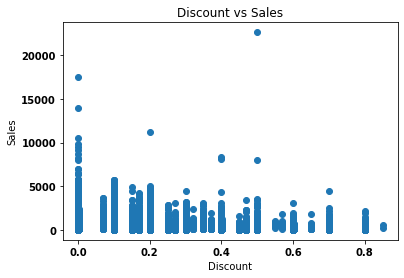

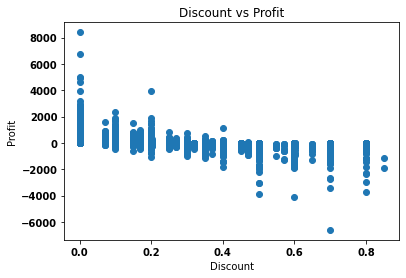

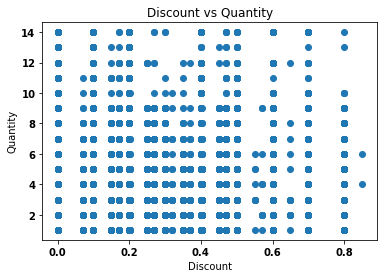

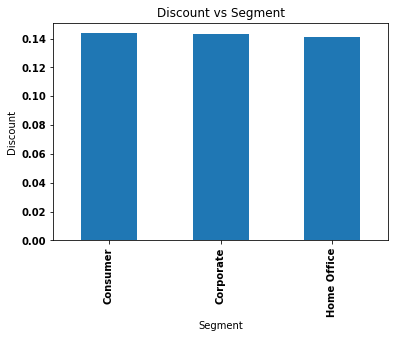

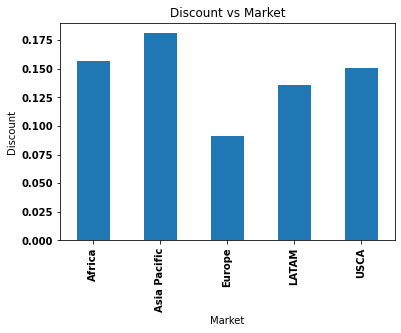

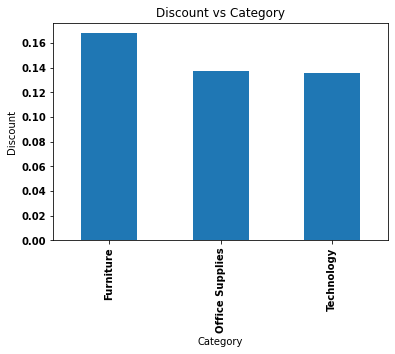

In [ ]:
# Create a scatter plot of discount vs sales
plt.scatter(data['Discount'], data['Sales'])
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

# Create a scatter plot of discount vs profit
plt.scatter(data['Discount'], data['Profit'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Create a scatter plot of discount vs quantity
plt.scatter(data['Discount'], data['Quantity'])
plt.title('Discount vs Quantity')
plt.xlabel('Discount')
plt.ylabel('Quantity')
plt.show()

# Create a bar chart of discount vs segment
discount_segment = data.groupby('Segment')['Discount'].mean()
discount_segment.plot(kind='bar')
plt.title('Discount vs Segment')
plt.xlabel('Segment')
plt.ylabel('Discount')
plt.show()

# Create a bar chart of discount vs market
discount_market = data.groupby('Market')['Discount'].mean()
discount_market.plot(kind='bar')
plt.title('Discount vs Market')
plt.xlabel('Market')
plt.ylabel('Discount')
plt.show()

# Create a bar chart of discount vs category
discount_category = data.groupby('Category')['Discount'].mean()
discount_category.plot(kind='bar')
plt.title('Discount vs Category')
plt.xlabel('Category')
plt.ylabel('Discount')
plt.show()


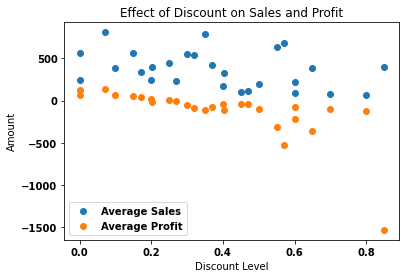

In [ ]:
# Group data by discount level
discount_group = data.groupby('Discount')

# Calculate average sales and profit for each discount level
avg_sales = discount_group['Sales'].mean()
avg_profit = discount_group['Profit'].mean()

# Create a scatter plot to visualize the relationship between discount and sales/profit
plt.scatter(avg_sales.index, avg_sales, label='Average Sales')
plt.scatter(avg_profit.index, avg_profit, label='Average Profit')
plt.xlabel('Discount Level')
plt.ylabel('Amount')
plt.title('Effect of Discount on Sales and Profit')
plt.legend()
plt.show()


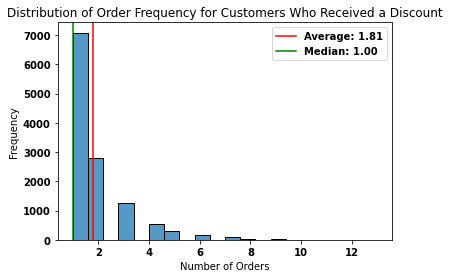

In [ ]:
# Filter data for customers who received a discount
discount_data = data[data['Discount'] > 0]

# Group data by customer ID and month
discount_group = discount_data.groupby(['Customer ID', 'month'])

# Count the number of orders for each customer-month combination
order_count = discount_group['Order ID'].count()

# Calculate the average and median number of orders per customer per month
avg_order_count = order_count.mean()
median_order_count = order_count.median()

# Create a histogram to visualize the distribution of order counts
sns.histplot(order_count, bins=20)
plt.axvline(avg_order_count, color='r', label=f'Average: {avg_order_count:.2f}')
plt.axvline(median_order_count, color='g', label=f'Median: {median_order_count:.2f}')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Order Frequency for Customers Who Received a Discount')
plt.legend()
plt.show()


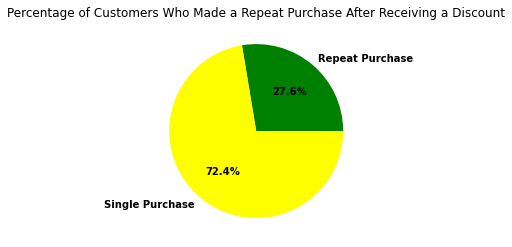

In [ ]:
# Calculate the percentage of customers who made a repeat purchase after receiving a discount
discount_data = data[data['Discount'] > 0]
repeat_purchase = discount_data.groupby(['Customer ID'])['Order Date'].nunique() > 1
repeat_purchase_rate = repeat_purchase.sum() / repeat_purchase.count()

# Create a pie chart to visualize the percentage of customers who made a repeat purchase
labels = ['Repeat Purchase', 'Single Purchase']
sizes = [repeat_purchase_rate, 1-repeat_purchase_rate]
colors = ['Green', 'Yellow']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Customers Who Made a Repeat Purchase After Receiving a Discount')
plt.show()


In [ ]:
# Create a copy of the original data
discount_data = data.copy()

# Create a column to identify whether a customer is new or returning
discount_data['Customer Type'] = discount_data.groupby('Customer Name')['Order Date'].rank(method='first')
discount_data['Customer Type'] = np.where(discount_data['Customer Type'] == 1, 'New Customer', 'Returning Customer')

# Create a column to identify whether a sale was made with a discount or not
discount_data['Discounted Sale'] = np.where(discount_data['Discount'] > 0, 'Yes', 'No')

# Group the data by discount level and customer type
discount_group = discount_data.groupby(['Discounted Sale', 'Customer Type'])

# Calculate the total number of customers and total sales for each group
total_customers = discount_group['Customer Name'].nunique()
total_sales = discount_group['Sales'].sum()
print(total_customers)
print(total_sales)
# Calculate the percentage increase in customers and sales with discount
pct_increase_customers = ((total_customers['Yes'] - total_customers['No']) / total_customers['No']) * 100
pct_increase_sales = ((total_sales['Yes'] - total_sales['No']) / total_sales['No']) * 100
print(pct_increase_customers)
print(pct_increase_sales)

Discounted Sale  Customer Type     
No               New Customer          442
                 Returning Customer    795
Yes              New Customer          354
                 Returning Customer    796
Name: Customer Name, dtype: int64
Discounted Sale  Customer Type     
No               New Customer          1.600767e+05
                 Returning Customer    6.832334e+06
Yes              New Customer          1.220768e+05
                 Returning Customer    5.528014e+06
Name: Sales, dtype: float64
Customer Type
New Customer         -19.909502
Returning Customer     0.125786
Name: Customer Name, dtype: float64
Customer Type
New Customer         -23.738572
Returning Customer   -19.090402
Name: Sales, dtype: float64


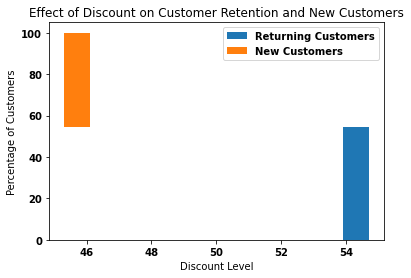

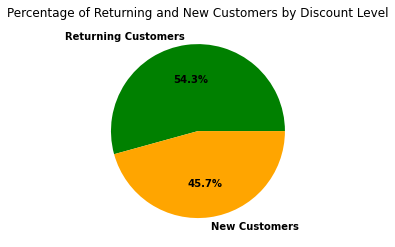

In [ ]:
# Group data by discount level and customer name
discount_group = data.groupby(['Discount', 'Customer Name'])

# Count the number of orders each customer has made at each discount level
order_count = discount_group['Order ID'].nunique()

# Count the number of orders made by each customer at each discount level where the customer has made at least one previous order
returning_customers = order_count.groupby('Customer Name').apply(lambda x: x > 1).sum()

# Count the number of orders made by each customer at each discount level where the customer has not made any previous orders
new_customers = order_count.groupby('Customer Name').apply(lambda x: x == 1).sum()

# Calculate the percentage of returning customers and new customers for each discount level
total_customers = returning_customers + new_customers
returning_percent = 100 * returning_customers / total_customers
new_percent = 100 * new_customers / total_customers

# Create a stacked bar chart to visualize the percentage of returning customers and new customers for each discount level
plt.bar(returning_percent, returning_percent, label='Returning Customers')
plt.bar(new_percent, new_percent, bottom=returning_percent, label='New Customers')
plt.xlabel('Discount Level')
plt.ylabel('Percentage of Customers')
plt.title('Effect of Discount on Customer Retention and New Customers')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Create a list of labels for the pie chart
labels = ['Returning Customers', 'New Customers']

# Create a list of the percentages for the pie chart
percentages = [returning_percent, new_percent]

# Set the colors for the pie chart
colors = ['green', 'orange']

# Create the pie chart
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Percentage of Returning and New Customers by Discount Level')

# Display the pie chart
plt.show()



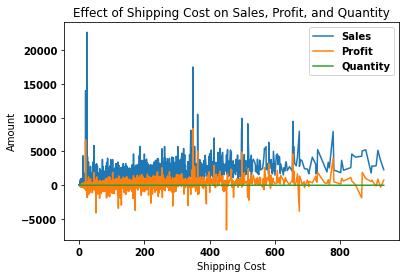

In [ ]:
# Group data by shipping cost
shipping_group = data.groupby('Shipping Cost')

# Calculate average sales, profit, and quantity for each shipping cost level
avg_sales = shipping_group['Sales'].mean()
avg_profit = shipping_group['Profit'].mean()
avg_quantity = shipping_group['Quantity'].mean()

# Create line charts to visualize the relationship between shipping cost and sales/profit/quantity
plt.plot(avg_sales.index, avg_sales, label='Sales')
plt.plot(avg_profit.index, avg_profit, label='Profit')
plt.plot(avg_quantity.index, avg_quantity, label='Quantity')

plt.xlabel('Shipping Cost')
plt.ylabel('Amount')
plt.title('Effect of Shipping Cost on Sales, Profit, and Quantity')
plt.legend()
plt.show()


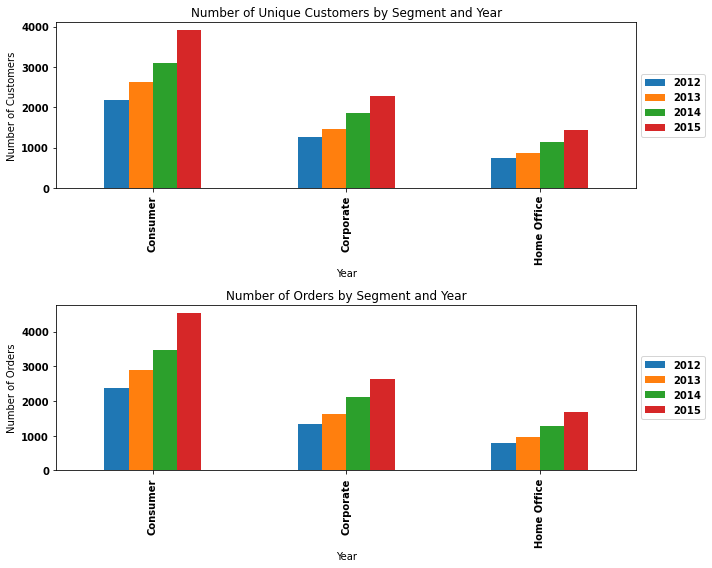

In [ ]:
# Group data by segment and year
grouped_data = data.groupby(['Segment', data['Order Date'].dt.year])

# Count number of unique customers and orders for each group
customer_counts = grouped_data['Customer ID'].nunique()
order_counts = grouped_data['Order ID'].nunique()

# Plot the data
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
customer_counts.unstack().plot(kind='bar', ax=ax[0])
order_counts.unstack().plot(kind='bar', ax=ax[1])

# Set plot titles and labels
ax[0].set_title('Number of Unique Customers by Segment and Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Customers')
ax[1].set_title('Number of Orders by Segment and Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Orders')

# Move the legends outside the plot
ax[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()


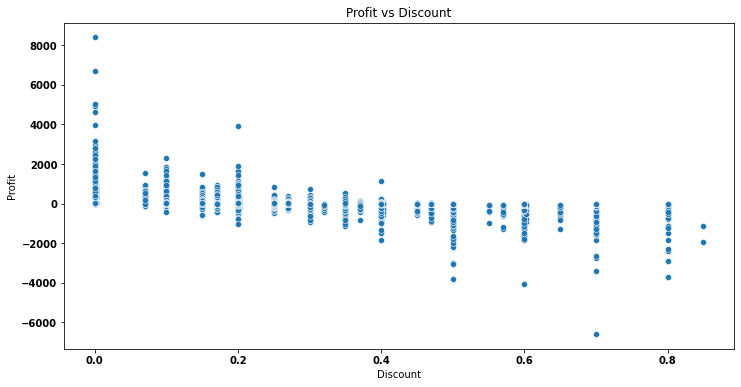

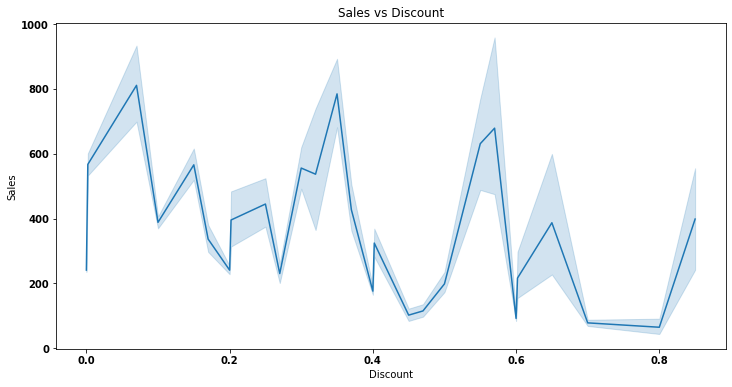

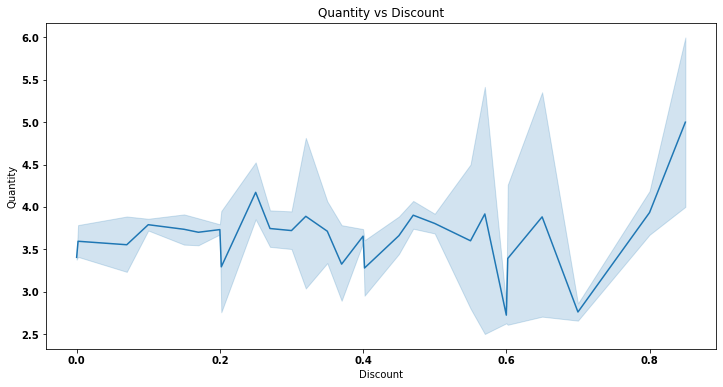

In [ ]:
# Analyze the pricing strategies
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='Discount', y='Profit')
plt.title('Profit vs Discount')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Discount', y='Sales')
plt.title('Sales vs Discount')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Discount', y='Quantity')
plt.title('Quantity vs Discount')
plt.show()

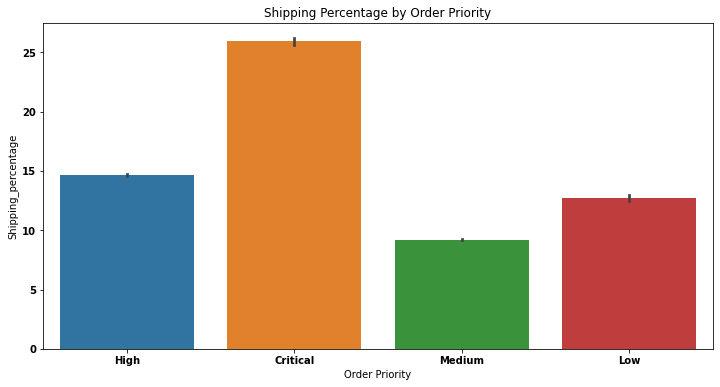

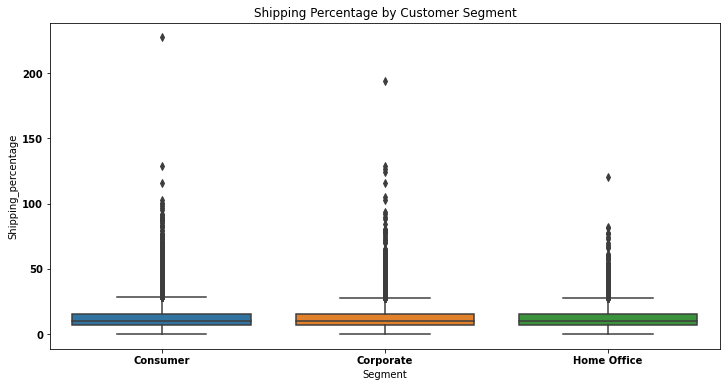

In [ ]:
# Calculate shipping percentage
data['Shipping_percentage'] = data['Shipping Cost'] / data['Sales'] * 100

# Analyze shipping percentage by order priority
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Order Priority', y='Shipping_percentage')
plt.title('Shipping Percentage by Order Priority')
plt.show()

plt.show()
# Analyze shipping percentage by segment
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Segment', y='Shipping_percentage')
plt.title('Shipping Percentage by Customer Segment')
plt.show()


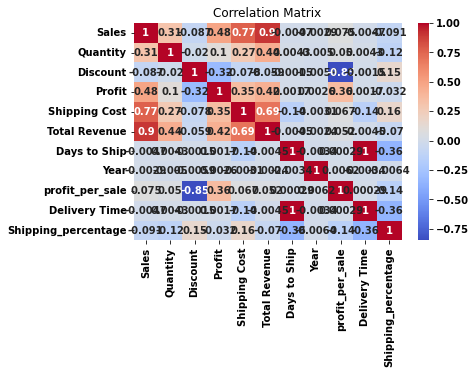

In [ ]:
from matplotlib import colors
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


#FINAL

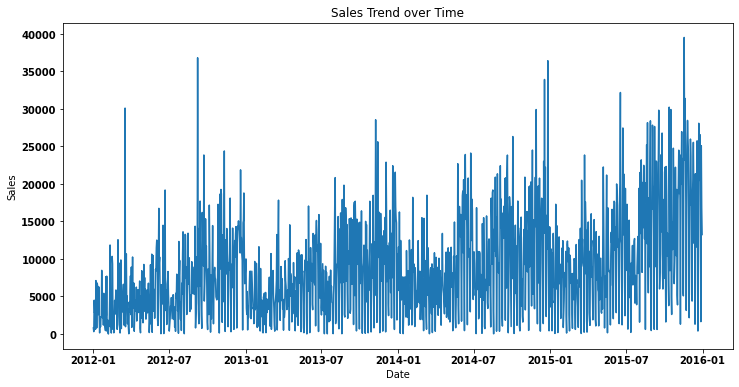

In [ ]:
# Convert Order Date column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Group the data by Order Date and calculate total sales for each date
sales_by_date = data.groupby('Order Date')['Sales'].sum().reset_index()

# Set Order Date as the index
sales_by_date = sales_by_date.set_index('Order Date')

# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(sales_by_date)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend over Time')
plt.show()


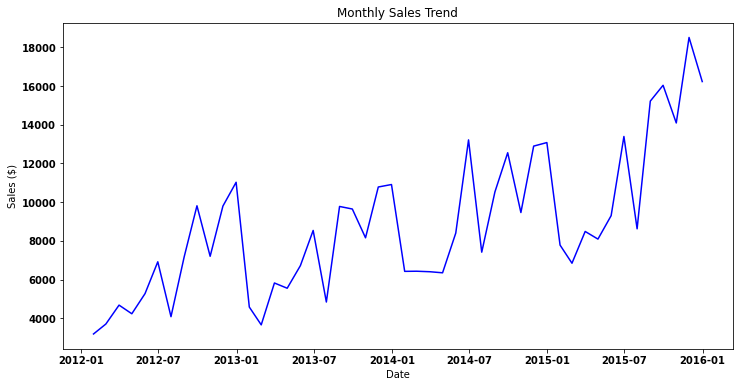

In [ ]:
# Resample Sales data by month and calculate the mean
monthly_sales = sales_by_date.resample('M').mean()

# Plot the time series of Sales data
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.show()

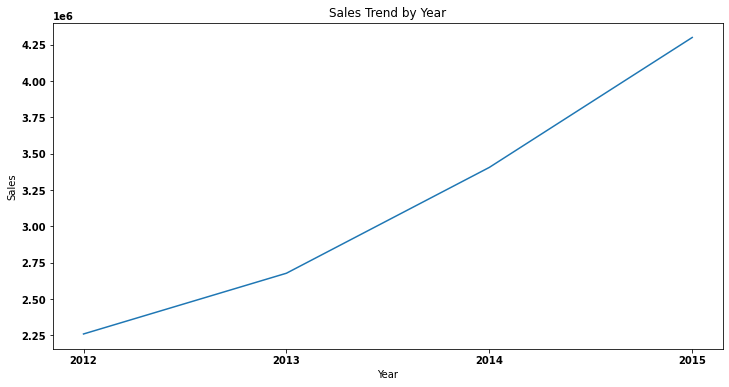

In [ ]:
# Convert Order Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract year from Order Date
data['Year'] = data['Order Date'].dt.year

# Group sales by year
yearly_sales = data.groupby('Year')['Sales'].sum()

# Plot sales trend by year
plt.figure(figsize=(12,6))
plt.plot(yearly_sales.index, yearly_sales.values)
plt.xticks(yearly_sales.index)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend by Year')
plt.show()


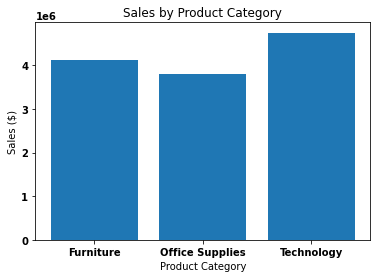

In [ ]:
# Group by product category and sum the sales
sales_by_category = data.groupby('Category')['Sales'].sum()

# Create a bar chart
plt.bar(sales_by_category.index, sales_by_category.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales ($)')
plt.show()

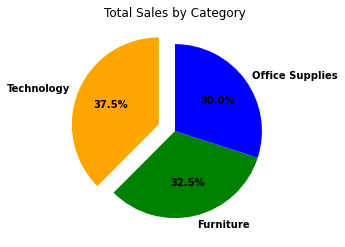

In [ ]:
import matplotlib.pyplot as plt

# Group the data by category and calculate the total sales for each category
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

# Create a list of colors to use for each category
colors = ['orange', 'green', 'blue']

# Set the explode values for each category
explode = (0.2, 0, 0)

# Create the pie chart
plt.pie(category_sales['Sales'], labels=category_sales['Category'], colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Total Sales by Category')

# Show the chart
plt.show()


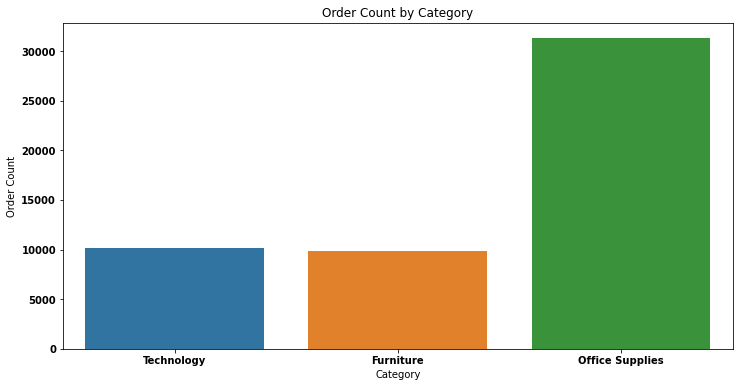

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Category')
plt.title('Order Count by Category')
plt.xlabel('Category')
plt.ylabel('Order Count')
plt.show()

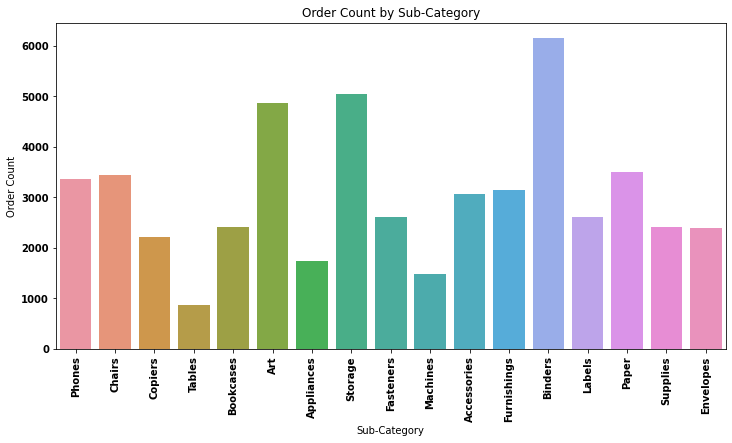

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Sub-Category')
plt.title('Order Count by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Order Count')
plt.xticks(rotation=90)
plt.show()


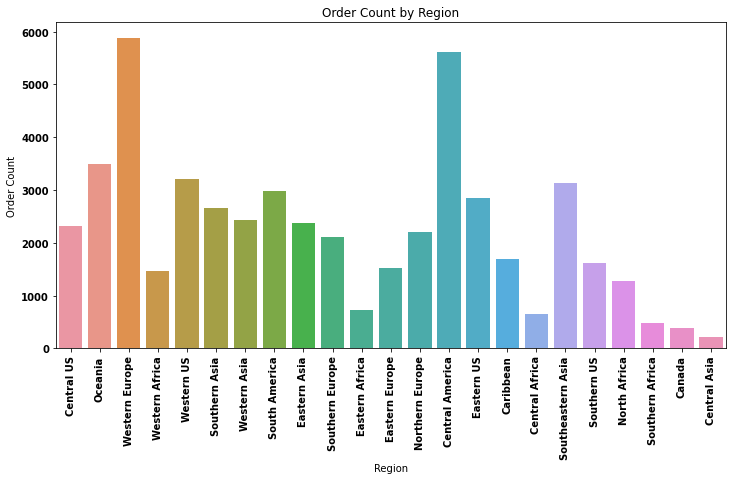

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Region')
plt.xticks(rotation=90)
plt.title('Order Count by Region')
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.show()


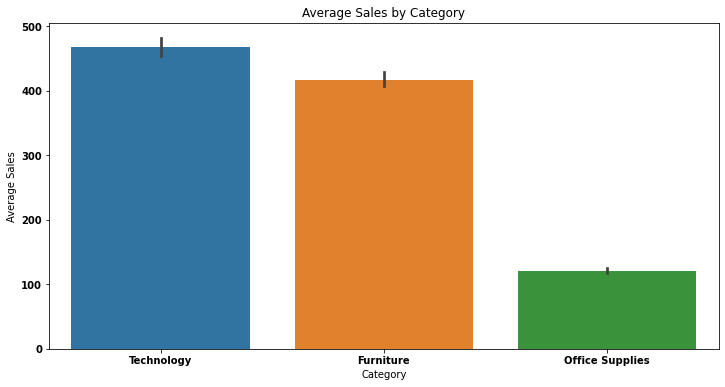

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Category', y='Sales')
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.show()


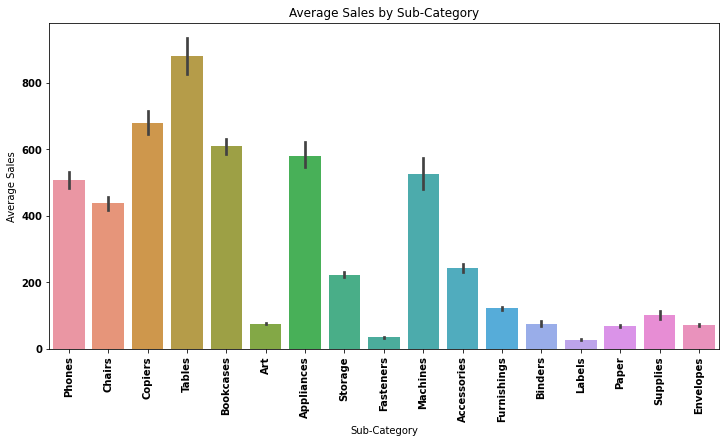

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Sub-Category', y='Sales')
plt.title('Average Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.show()


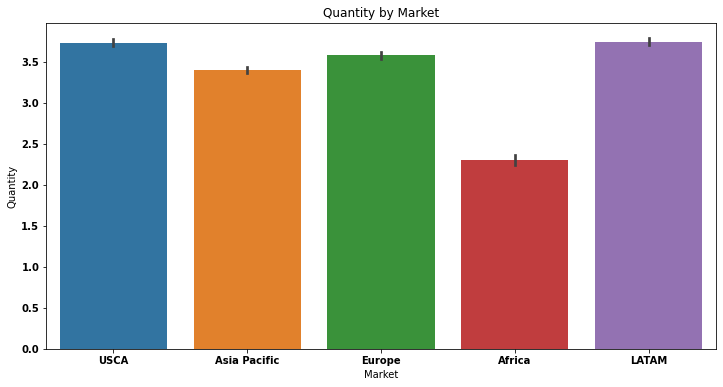

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Market', y='Quantity')
plt.title('Quantity by Market')
plt.show()

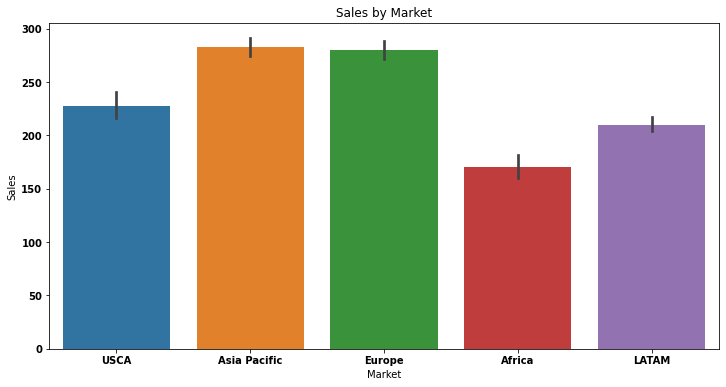

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Market', y='Sales')
plt.title('Sales by Market')
plt.show()

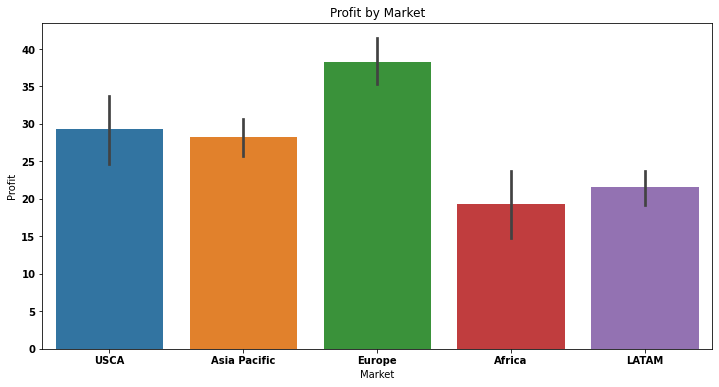

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Market', y='Profit')
plt.title('Profit by Market')
plt.show()

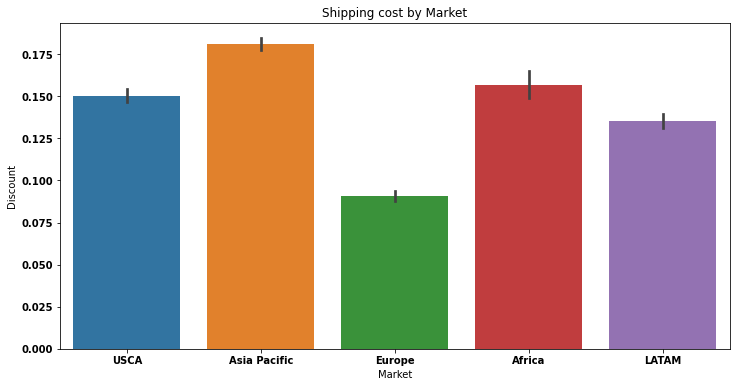

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='Market', y='Discount')
plt.title('Shipping cost by Market')
plt.show()